<a href="https://colab.research.google.com/github/florinaptl/FP_test_VR/blob/main/20240204_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

import os

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [186]:
plt.style.use('seaborn-v0_8-pastel')

# Raw dataset

In [187]:
path="/content/drive/MyDrive/Data collected with participant's info"
extension='.csv'
files = [file for file in os.listdir(path) if file.endswith(extension)]


In [188]:
for file in files:
    print(file);

OutputOf_Lasse_Weyergang_Rahbek.csv
OutputOf_Adrian_Daniel_McCreadie.csv
OutputOf_Alexandru_Cioanca.csv
OutputOf_Yasmin_Taghizadeh.csv
OutputOf_Dagmar.csv
OutputOf_Frederik_Callesen.csv
OutputOf_Anna_Kristoffersen.csv
OutputOf_Hannah_Jerg.csv
OutputOf_Oscar_Findal_Andreassen.csv
OutputOf_Chang_Xiong.csv
OutputOf_Qizhi_Yang.csv
OutputOf_Andreas_Kaae_Astrup.csv
OutputOf_Xiao_Xia_Hao.csv
OutputOf_Lena_Fisker.csv
OutputOf_Sofie_Sogaard.csv
OutputOf_Ana_Paula_Barcia.csv
OutputOf_Daniel_Rasmussen.csv
OutputOf_Jialiang_Wang.csv
OutputOf_Thorvald_Lund.csv
OutputOf_David_Stamenov.csv
OutputOf_Florina_Pantilimonescu.csv
OutputOf_Anne_Sorensen.csv
OutputOf_Nathan_Dupas.csv
OutputOf_Kristina_Hoffmann.csv
OutputOf_Xinyu_Shi.csv
OutputOf_Viktor_Marton.csv
OutputOf_ValentinaBeatini_test.csv


In [189]:
raw_dfs = []
for file in files:
    myPath="".join((path, '/', file))
    df = pd.read_csv(myPath, encoding='unicode_escape')
    raw_dfs.append(df)
raw_df = pd.concat(raw_dfs, ignore_index=True)

raw_df.head()


,pleasure,arousal,dominance,speed,nrCircles,noOfSpots,spotsPosition,spotRadius,nrOfCurrentSequence,nameOfCurrentSequence,myTime,myFrameNumber,actualTime,actualFrameNumber,Name,Age group,Nationality,Gender,allocatedTimeForRating
0,4,4,3,0.010000,1,1,0,0.600000,0,initial mood,11.78,589,266.78,13339,Lasse Weyergang Rahbek,1,danish,2,266.78
1,4,4,3,1.460931,3,10,0,0.400000,2,random 2,34.70,1735,361.52,18076,Lasse Weyergang Rahbek,1,danish,2,94.74
2,3,3,2,5.000000,3,8,0,0.600000,3,high speed few spots,53.00,2650,444.56,22228,Lasse Weyergang Rahbek,1,danish,2,83.04
3,5,1,4,0.200000,3,50,0,0.600000,4,medium speed high nr of spots,61.44,3072,476.04,23802,Lasse Weyergang Rahbek,1,danish,2,31.48
4,2,4,2,0.200000,3,5,0,0.650001,5,explosion with big radius,77.18,3859,493.26,24663,Lasse Weyergang Rahbek,1,danish,2,17.22


# Participant's statistics

In [190]:
participants_df=raw_df[["Name", "Age group","Nationality", "Gender"]]
participants_df=participants_df.drop_duplicates()

participants_df.head()

,Name,Age group,Nationality,Gender
0,Lasse Weyergang Rahbek,1,danish,2
17,Adrian Daniel McCreadie,2,irish,2
34,Alexandru Cioanca,1,romanian,2
51,Yasmin Taghizadeh,1,iranian,1
68,Dagmar Haubjerg Andersen,0,danish,1


## Describe nationality, age group and gender

Text(0.5, 1.0, 'Participants by nationality - breakdown')

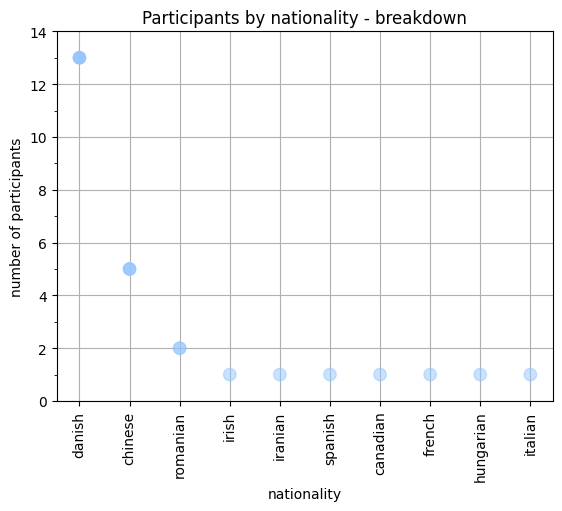

In [191]:
fig, ax=plt.subplots()
nationality_counts=participants_df['Nationality'].value_counts()
ax.scatter(nationality_counts.index, nationality_counts.values, s=80, alpha=1-1/nationality_counts.values/2)

ax.set_yticks(np.arange(0,15,1), minor=True)
plt.setp(ax.get_xticklabels(), rotation=90)
ax.grid(True)
ax.set_axisbelow(True)

ax.set_xlabel("nationality")
ax.set_ylabel("number of participants")
ax.set_title("Participants by nationality - breakdown")

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_participants_and_affective_response/"+ax.get_title()+'.png', dpi=600, bbox_inches='tight')

Text(0.5, 1.0, 'Participants by age group')

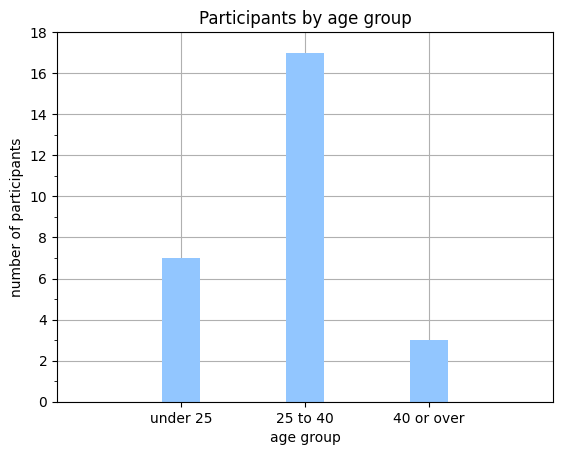

In [192]:
fig, ax=plt.subplots()
age_counts=participants_df['Age group'].value_counts()
ax.bar(age_counts.index, age_counts.values, width=0.3)

ax.set_yticks(np.arange(0,15,1), minor=True)
ax.grid(True)
ax.set_axisbelow(True)

ax.set(xlim=(-1,3),
       ylim=(0,18))
ax.set_xticks([0,1,2], labels=['under 25', '25 to 40', '40 or over'])
ax.set_xlabel("age group")
ax.set_ylabel("number of participants")
ax.set_title("Participants by age group")

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_participants_and_affective_response/"+ax.get_title()+'.png', dpi=600, bbox_inches='tight')

Text(0.5, 1.0, 'Participants by gender')

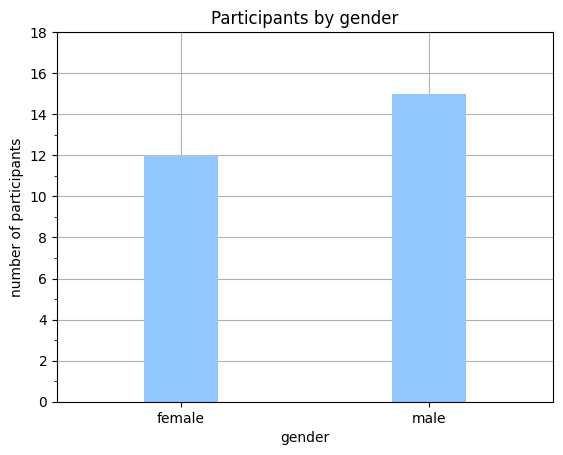

In [193]:
fig, ax=plt.subplots()
age_counts=participants_df['Gender'].value_counts()
ax.bar(age_counts.index, age_counts.values, width=0.3)

ax.set_yticks(np.arange(0,15,1), minor=True)
ax.grid(True)
ax.set_axisbelow(True)

ax.set(xlim=(0.5,2.5),
       ylim=(0,18))
ax.set_xticks([1,2], labels=['female', 'male'])
ax.set_xlabel("gender")
ax.set_ylabel("number of participants")
ax.set_title("Participants by gender")

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_participants_and_affective_response/"+ax.get_title()+'.png', dpi=600, bbox_inches='tight')

## Describe rating

Text(0.5, 1.0, 'Participants by pleasure and time')

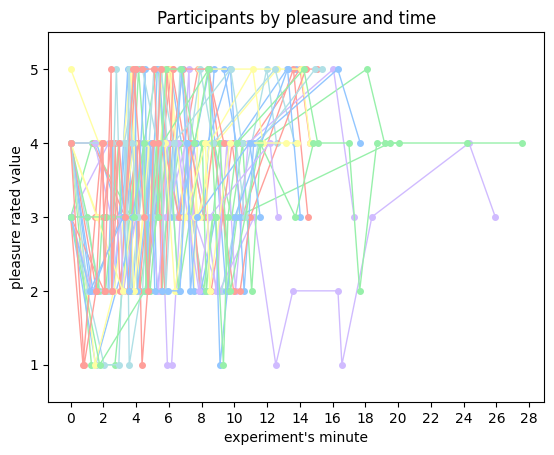

In [194]:
fig, ax=plt.subplots()


for i in range(participants_df.shape[0]):
  myParticipant_df=raw_df[raw_df['Name']==participants_df['Name'].iloc[i]]
  ax.plot((myParticipant_df['actualTime'].iloc[:myParticipant_df.shape[0] if myParticipant_df.shape[0]<=17 else 17]-myParticipant_df['actualTime'].iloc[0])/60, myParticipant_df['pleasure'].iloc[:myParticipant_df.shape[0] if myParticipant_df.shape[0]<=17 else 17], 'o', ls='-', ms=4, lw=1)
  #print(participants_df['Name'].iloc[i])
  #print(myParticipant_df['actualTime']-myParticipant_df['actualTime'].iloc[0])

ax.set(ylim=(0.5,5.5))
ax.set_xticks(np.arange(0,30,2))
ax.set_yticks(np.arange(1,6,1))
ax.set_xlabel("experiment's minute")
ax.set_ylabel("pleasure rated value")
ax.set_title("Participants by pleasure and time")

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_participants_and_affective_response/"+ax.get_title()+'.png', dpi=600, bbox_inches='tight')


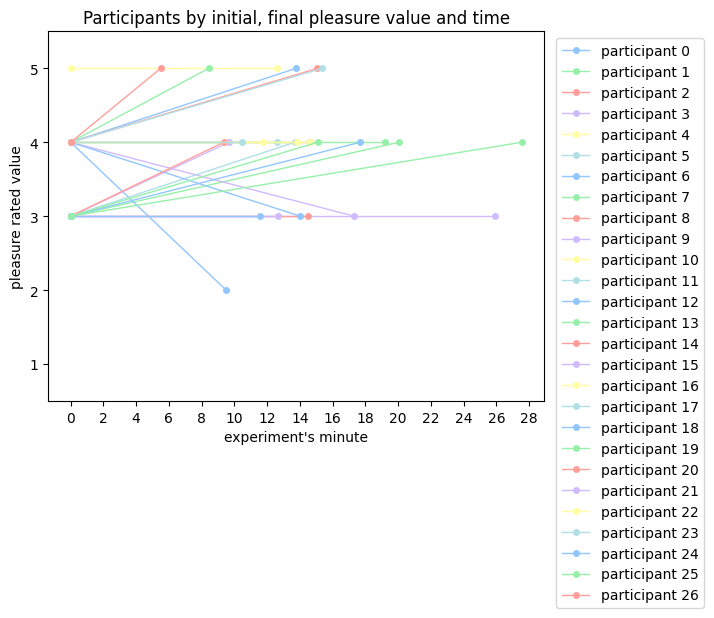

In [195]:
fig, ax=plt.subplots()


for i in range(participants_df.shape[0]):
  myParticipant_df=raw_df[raw_df['Name']==participants_df['Name'].iloc[i]]
  ax.plot((myParticipant_df['actualTime'].iloc[[0,myParticipant_df.shape[0]-1] if myParticipant_df.shape[0]<=17 else [0,16]]-myParticipant_df['actualTime'].iloc[0])/60, myParticipant_df['pleasure'].iloc[[0,myParticipant_df.shape[0]-1] if myParticipant_df.shape[0]<=17 else [0,16]],
          'o', ls='-', ms=4, lw=1, label="participant "+str(i))
  #print(participants_df['Name'].iloc[i])
  #print(myParticipant_df['actualTime']-myParticipant_df['actualTime'].iloc[0])

ax.set(ylim=(0.5,5.5))
ax.set_xticks(np.arange(0,30,2))
ax.set_yticks(np.arange(1,6,1))
ax.set_xlabel("experiment's minute")
ax.set_ylabel("pleasure rated value")
ax.set_title("Participants by initial, final pleasure value and time")
plt.legend(bbox_to_anchor=(1.01, 1))

#fig.savefig(ax.get_title()+'.png', dpi=600, bbox_inches='tight')

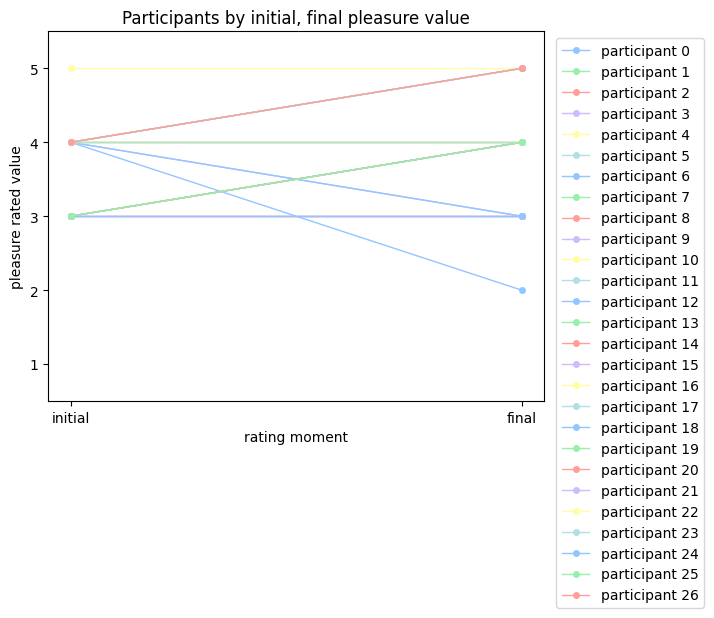

In [196]:
fig, ax=plt.subplots()


for i in range(participants_df.shape[0]):
  myParticipant_df=raw_df[raw_df['Name']==participants_df['Name'].iloc[i]]
  ax.plot([0,1], myParticipant_df['pleasure'].iloc[[0,myParticipant_df.shape[0]-1] if myParticipant_df.shape[0]<=17 else [0,16]],
          'o', ls='-', ms=4, lw=1, label="participant "+str(i))
  #print(participants_df['Name'].iloc[i])
  #print(myParticipant_df['actualTime']-myParticipant_df['actualTime'].iloc[0])

ax.set(ylim=(0.5,5.5))
ax.set_xticks([0,1], labels=['initial', 'final'])
ax.set_yticks(np.arange(1,6,1))
ax.set_xlabel("rating moment")
ax.set_ylabel("pleasure rated value")
ax.set_title("Participants by initial, final pleasure value")
plt.legend(bbox_to_anchor=(1.01, 1))

### Describe rating for initial and final mood

In [197]:
initialFinal_data=raw_df[raw_df['nameOfCurrentSequence'].isin(['initial mood', 'final mood'])]
initialFinal_data.head()


,pleasure,arousal,dominance,speed,nrCircles,noOfSpots,spotsPosition,spotRadius,nrOfCurrentSequence,nameOfCurrentSequence,myTime,myFrameNumber,actualTime,actualFrameNumber,Name,Age group,Nationality,Gender,allocatedTimeForRating
0,4,4,3,0.01,1,1,0,0.6,0,initial mood,11.78,589,266.78,13339,Lasse Weyergang Rahbek,1,danish,2,266.78
16,5,5,5,0.01,1,1,0,0.6,17,final mood,258.52,12926,1093.00,54650,Lasse Weyergang Rahbek,1,danish,2,33.56
17,3,1,4,0.01,1,1,0,0.6,0,initial mood,9.26,463,264.26,13213,Adrian Daniel McCreadie,2,irish,2,264.26
33,4,1,5,0.01,1,1,0,0.6,17,final mood,258.74,12937,1467.38,73369,Adrian Daniel McCreadie,2,irish,2,33.78
34,4,1,4,0.01,1,1,0,0.6,0,initial mood,14.74,737,479.74,23987,Alexandru Cioanca,1,romanian,2,479.74


In [198]:
initialFinalRating_df=pd.DataFrame({'pleasureInitial':[], 'pleasureFinal':[], 'arousalInitial':[], 'arousalFinal':[], 'dominanceInitial':[], 'dominanceFinal':[], 'Name':[]})

for i in range(participants_df.shape[0]):
  myParticipant_df=initialFinal_data[initialFinal_data['Name']==participants_df['Name'].iloc[i]]
  if myParticipant_df.shape[0] in [2,3]:
      row=pd.DataFrame({
          'pleasureInitial':  [myParticipant_df[myParticipant_df['nameOfCurrentSequence']=='initial mood'].iloc[0].at['pleasure']],
          'pleasureFinal':    [myParticipant_df[myParticipant_df['nameOfCurrentSequence']=='final mood'].iloc[0].at['pleasure']],
          'arousalInitial':   [myParticipant_df[myParticipant_df['nameOfCurrentSequence']=='initial mood'].iloc[0].at['arousal']],
          'arousalFinal':     [myParticipant_df[myParticipant_df['nameOfCurrentSequence']=='final mood'].iloc[0].at['arousal']],
          'dominanceInitial': [myParticipant_df[myParticipant_df['nameOfCurrentSequence']=='initial mood'].iloc[0].at['dominance']],
          'dominanceFinal':   [myParticipant_df[myParticipant_df['nameOfCurrentSequence']=='final mood'].iloc[0].at['dominance']],
          'Name': [myParticipant_df['Name'].iloc[0]]})
      initialFinalRating_df=pd.concat([initialFinalRating_df,row], ignore_index = True)
initialFinalRating_df


,pleasureInitial,pleasureFinal,arousalInitial,arousalFinal,dominanceInitial,dominanceFinal,Name
0,4.0,5.0,4.0,5.0,3.0,5.0,Lasse Weyergang Rahbek
1,3.0,4.0,1.0,1.0,4.0,5.0,Adrian Daniel McCreadie
2,4.0,4.0,1.0,1.0,4.0,5.0,Alexandru Cioanca
3,3.0,3.0,1.0,4.0,3.0,2.0,Yasmin Taghizadeh
4,4.0,4.0,3.0,1.0,3.0,4.0,Frederik Callesen
5,4.0,2.0,1.0,1.0,2.0,1.0,Anna Elisabeth Kristoffersen
6,4.0,4.0,3.0,3.0,3.0,1.0,Hannah Jerg
7,3.0,3.0,3.0,3.0,3.0,1.0,Oscar Findal Andreassen
8,4.0,3.0,2.0,2.0,3.0,2.0,Chang Xiong
9,4.0,4.0,3.0,1.0,4.0,5.0,Qizhi Yang


<class 'pandas.core.frame.DataFrame'>


Text(0.5, 1.0, 'Participants by initial and final pleasure value')

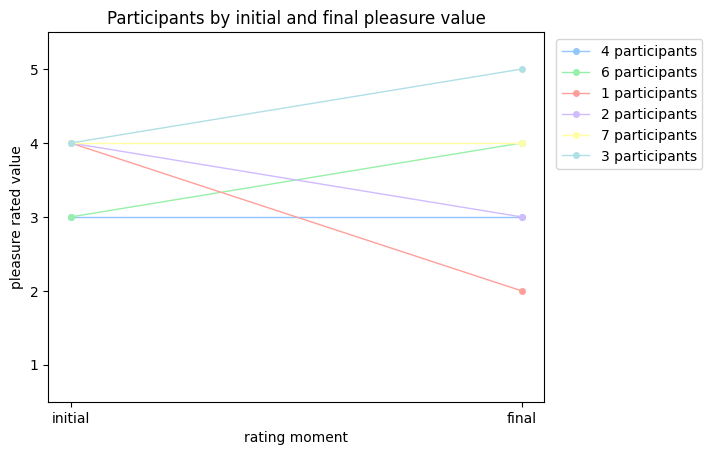

In [199]:
pleasureGrouped_df=initialFinalRating_df[['pleasureInitial', 'pleasureFinal', 'Name']]
pleasureGrouped_df=pleasureGrouped_df.groupby(['pleasureInitial', 'pleasureFinal']).describe().reset_index()
print(type(pleasureGrouped_df))
fig, ax=plt.subplots()
for i in range(pleasureGrouped_df.shape[0]):
    ax.plot([0,1], [pleasureGrouped_df.iloc[i].at['pleasureInitial'], pleasureGrouped_df.iloc[i].at['pleasureFinal']],
            'o', ls='-', ms=4, lw=1, label=str(pleasureGrouped_df.iloc[i].to_frame().loc['Name'].loc['count'].iloc[0])+" participants")
plt.legend(bbox_to_anchor=(1.01, 1))

ax.set(ylim=(0.5,5.5))
ax.set_xticks([0,1], labels=['initial', 'final'])
ax.set_yticks(np.arange(1,6,1))
ax.set_xlabel("rating moment")
ax.set_ylabel("pleasure rated value")
ax.set_title("Participants by initial and final pleasure value")

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_participants_and_affective_response/"+ax.get_title()+'.png', dpi=600, bbox_inches='tight')

<class 'pandas.core.frame.DataFrame'>


Text(0.5, 1.0, 'Participants by initial and final arousal value')

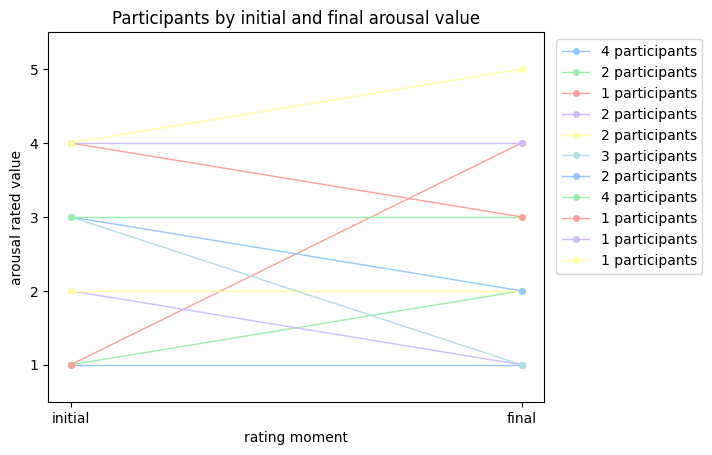

In [200]:
pleasureGrouped_df=initialFinalRating_df[['arousalInitial', 'arousalFinal', 'Name']]
pleasureGrouped_df=pleasureGrouped_df.groupby(['arousalInitial', 'arousalFinal']).describe().reset_index()
print(type(pleasureGrouped_df))
fig, ax=plt.subplots()
for i in range(pleasureGrouped_df.shape[0]):
    ax.plot([0,1], [pleasureGrouped_df.iloc[i].at['arousalInitial'], pleasureGrouped_df.iloc[i].at['arousalFinal']],
            'o', ls='-', ms=4, lw=1, label=str(pleasureGrouped_df.iloc[i].to_frame().loc['Name'].loc['count'].iloc[0])+" participants")
plt.legend(bbox_to_anchor=(1.01, 1))

ax.set(ylim=(0.5,5.5))
ax.set_xticks([0,1], labels=['initial', 'final'])
ax.set_yticks(np.arange(1,6,1))
ax.set_xlabel("rating moment")
ax.set_ylabel("arousal rated value")
ax.set_title("Participants by initial and final arousal value")

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_participants_and_affective_response/"+ax.get_title()+'.png', dpi=600, bbox_inches='tight')

<class 'pandas.core.frame.DataFrame'>


Text(0.5, 1.0, 'Participants by initial and final dominance value')

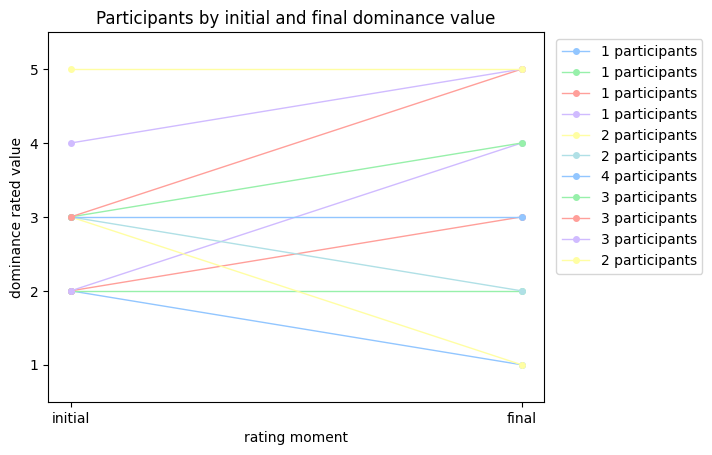

In [201]:
pleasureGrouped_df=initialFinalRating_df[['dominanceInitial', 'dominanceFinal', 'Name']]
pleasureGrouped_df=pleasureGrouped_df.groupby(['dominanceInitial', 'dominanceFinal']).describe().reset_index()
print(type(pleasureGrouped_df))
fig, ax=plt.subplots()
for i in range(pleasureGrouped_df.shape[0]):
    ax.plot([0,1], [pleasureGrouped_df.iloc[i].at['dominanceInitial'], pleasureGrouped_df.iloc[i].at['dominanceFinal']],
            'o', ls='-', ms=4, lw=1, label=str(pleasureGrouped_df.iloc[i].to_frame().loc['Name'].loc['count'].iloc[0])+" participants")
plt.legend(bbox_to_anchor=(1.01, 1))

ax.set(ylim=(0.5,5.5))
ax.set_xticks([0,1], labels=['initial', 'final'])
ax.set_yticks(np.arange(1,6,1))
ax.set_xlabel("rating moment")
ax.set_ylabel("dominance rated value")
ax.set_title("Participants by initial and final dominance value")

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_participants_and_affective_response/"+ax.get_title()+'.png', dpi=600, bbox_inches='tight')

### Describe rating numbers and time

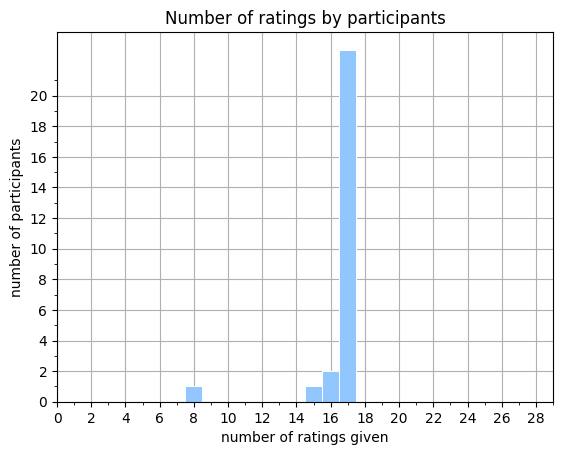

In [202]:
#count the number of numbers given
participant_counts=raw_df["Name"].value_counts()
type(participant_counts.to_frame())
participant_counts=participant_counts.reset_index()
participant_counts=participant_counts['count'].value_counts()
participant_counts

fig, ax = plt.subplots()
ax.bar(participant_counts.index, participant_counts.values, width=1, edgecolor="white", linewidth=0.7)

ax.set_xticks(np.arange(0,30,2), minor=False)
ax.set_xticks(np.arange(0,30,1), minor=True)
ax.set(ylabel="number of participants", xlabel="number of ratings given")
ax.set_yticks(np.arange(0,22,2), minor=False)
ax.set_yticks(np.arange(0,22,1), minor=True)
ax.set_title("Number of ratings by participants")

ax.grid(True)
ax.set_axisbelow(True)

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_participants_and_affective_response/"+ax.get_title()+'.png', dpi=600, bbox_inches='tight')

[Text(0.5, 0, "experiment's seconds"),
 Text(0, 0.5, 'frequency'),
 Text(0.5, 1.0, 'Frequency of time allocated per rating')]

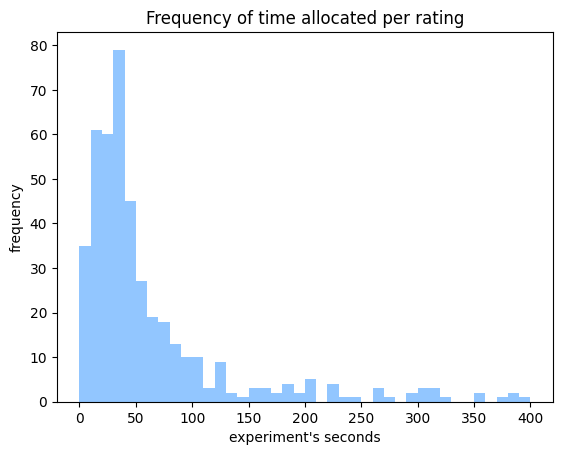

In [203]:
#time of response
fig, ax=plt.subplots()

ax.hist(raw_df['allocatedTimeForRating'], bins=40, density=False, range=(0,400))
#ax.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())
ax.set(xlabel="experiment's seconds", ylabel="frequency", title="Frequency of time allocated per rating")

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_participants_and_affective_response/"+ax.get_title()+'.png', dpi=600, bbox_inches='tight')

Text(0.5, 1, 'Time allocated per rating')

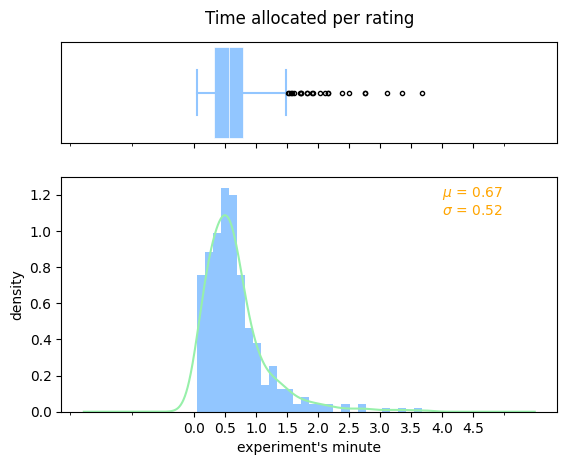

In [204]:
filteredData=raw_df[~raw_df['nameOfCurrentSequence'].isin(['initial mood', 'custom', 'random 2'])]

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)})

#box plot - the outliers are
VP = ax_box.boxplot(filteredData['allocatedTimeForRating']/60, positions=[2], widths=1.5, patch_artist=True, vert=False,
                showmeans=False, showfliers=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5},
                flierprops={"markersize":3} )

ax_box.set_yticks(np.arange(0,0))
ax_box.set_xticks(np.arange(0,5,0.5))

#histogram plot
n, bins, patches=ax_hist.hist(filteredData['allocatedTimeForRating']/60, bins='auto', density=True, cumulative=False)
#ax_hist.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())

myKde=(filteredData['allocatedTimeForRating']/60).plot.kde()


# add text box for the statistics
stats = (f"$\\mu$ = {(filteredData['allocatedTimeForRating']/60).mean().round(2)}\n"
         f"$\\sigma$ = {(filteredData['allocatedTimeForRating']/60).std().round(2)}\n"
         )
ax_hist.text(4,1,stats, color='orange')

ax_hist.set(xlabel="experiment's minute", ylabel="density")
ax_hist.set_title("Time allocated per rating", y=1, pad=110)

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_participants_and_affective_response/"+ax_hist.get_title()+'.png', dpi=600, bbox_inches='tight')

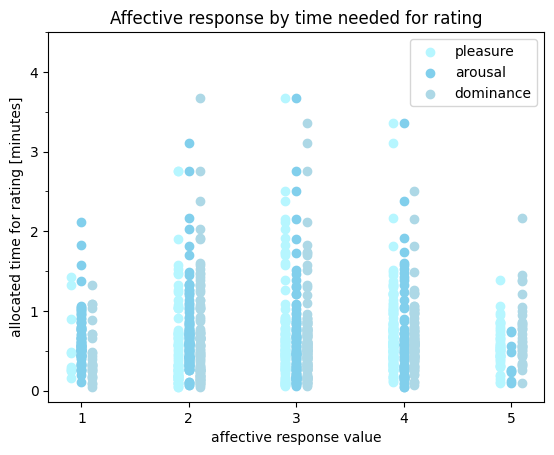

In [205]:
fig, ax=plt.subplots()

ax.scatter(filteredData['pleasure']-0.1, filteredData['allocatedTimeForRating']/60, label="pleasure", color="#B6F6FF")
ax.scatter(filteredData['arousal'], filteredData['allocatedTimeForRating']/60, label="arousal", color="#81CFEC" )
ax.scatter(filteredData['dominance']+0.1, filteredData['allocatedTimeForRating']/60, label="dominance", color="lightblue" )

ax.set_xticks(np.arange(1,6,1), minor=False)
ax.set(ylabel="allocated time for rating [minutes]", xlabel="affective response value")
ax.set_yticks(np.arange(0,5,1), minor=False)
ax.set_yticks(np.arange(0,5,0.5), minor=True)
ax.set_title("Affective response by time needed for rating")
ax.legend()

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_participants_and_affective_response/"+ax.get_title()+'.png', dpi=600, bbox_inches='tight')

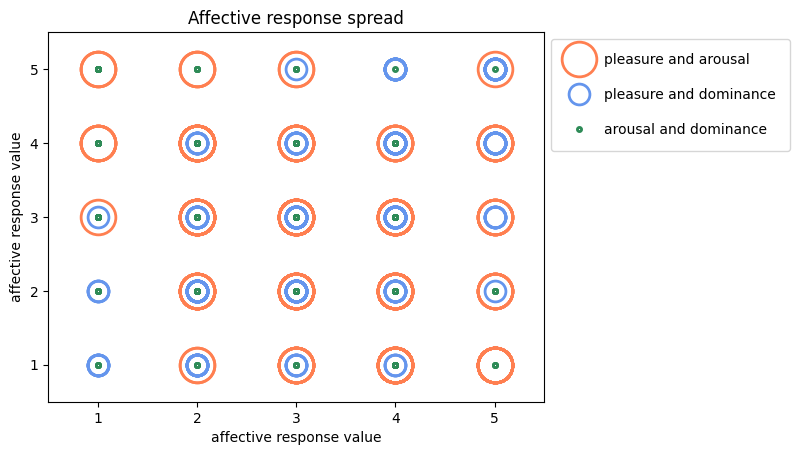

In [206]:
fig, ax=plt.subplots()

ax.plot((filteredData.sort_values(by=['pleasure']))['pleasure'], (filteredData.sort_values(by=['pleasure']))['arousal'],'o', fillstyle='none', markeredgecolor="coral", markersize=25, markeredgewidth=2, label="pleasure and arousal")
ax.plot((filteredData.sort_values(by=['pleasure']))['pleasure'], (filteredData.sort_values(by=['pleasure']))['dominance'], 'o', fillstyle='none', markeredgecolor="cornflowerblue", markersize=15, markeredgewidth=2, label='pleasure and dominance')
ax.plot((filteredData.sort_values(by=['arousal']))['arousal'], (filteredData.sort_values(by=['arousal']))['dominance'], 'o', fillstyle='none', markeredgecolor="seagreen", markersize=3, markeredgewidth=2, label='arousal and dominance')

ax.set_xticks(np.arange(1,6,1), minor=False)
ax.set(xlabel="affective response value", ylabel="affective response value")
ax.set_yticks(np.arange(1,6,1), minor=False)
ax.set_title("Affective response spread")
ax.set_xlim(0.5,5.5)
ax.set_ylim(0.5,5.5)

ax.legend(bbox_to_anchor=(1,1), borderpad=1, labelspacing=1.5)

(0.5, 5.5)

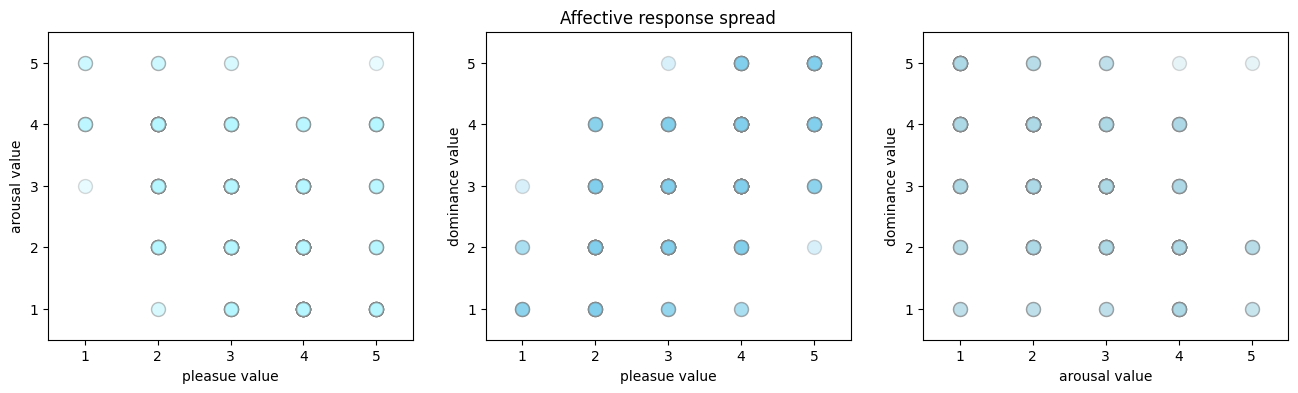

In [207]:
fig, ax=plt.subplots(1,3, figsize=(16,4))

ax[0].plot((filteredData.sort_values(by=['pleasure']))['pleasure'], (filteredData.sort_values(by=['pleasure']))['arousal'],'o', color='#B6F6FF', markersize=10, label="pleasure and arousal", alpha=0.3, markeredgecolor='grey')
ax[1].plot((filteredData.sort_values(by=['pleasure']))['pleasure'], (filteredData.sort_values(by=['pleasure']))['dominance'], 'o', color="#81CFEC", markersize=10, label='pleasure and dominance', alpha=0.3, markeredgecolor='grey')
ax[2].plot((filteredData.sort_values(by=['arousal']))['arousal'], (filteredData.sort_values(by=['arousal']))['dominance'], 'o', color="lightblue", markersize=10, label='arousal and dominance', alpha=0.3, markeredgecolor='grey')


ax[0].set_xticks(np.arange(1,6,1), minor=False)
ax[0].set(xlabel="pleasue value", ylabel="arousal value")
ax[0].set_yticks(np.arange(1,6,1), minor=False)
#ax[0].set_title("Affective response spread")
ax[0].set_xlim(0.5,5.5)
ax[0].set_ylim(0.5,5.5)

ax[1].set_xticks(np.arange(1,6,1), minor=False)
ax[1].set(xlabel="pleasue value", ylabel="dominance value")
ax[1].set_yticks(np.arange(1,6,1), minor=False)
ax[1].set_title("Affective response spread")
ax[1].set_xlim(0.5,5.5)
ax[1].set_ylim(0.5,5.5)

ax[2].set_xticks(np.arange(1,6,1), minor=False)
ax[2].set(xlabel="arousal value", ylabel="dominance value")
ax[2].set_yticks(np.arange(1,6,1), minor=False)
#ax[2].set_title("Affective response spread")
ax[2].set_xlim(0.5,5.5)
ax[2].set_ylim(0.5,5.5)

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_participants_and_affective_response/"+ax[1].get_title()+'.png', dpi=600, bbox_inches='tight')

## Describe affective response during experiment

In the data for describing the affective response (pleasure, arousal, dominance), the following sequences are removed: initial mood, final mood.

In [208]:
afectiveResponse_df=raw_df[~raw_df['nameOfCurrentSequence'].isin(['initial mood', 'final mood'])]
print(afectiveResponse_df.shape)

(396, 19)


[136  96  83  64  17]   [4 3 2 5 1]
[117 102  84  81  12]   [2 3 1 4 5]
[131 100  98  41  26]   [3 2 4 5 1]


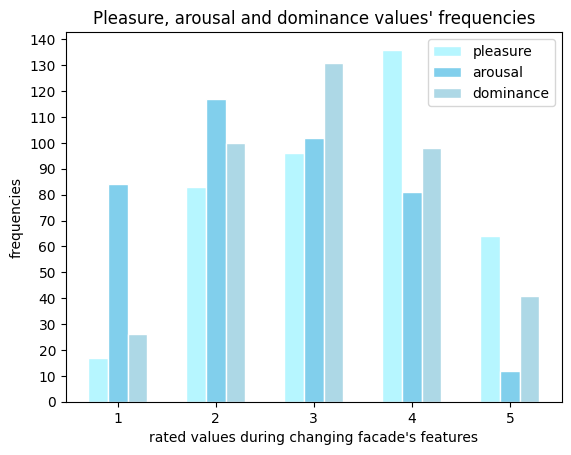

In [209]:
fig, ax=plt.subplots()
#values, bins, patches=ax.hist(afectiveResponse_df['pleasure'], bins=5)

counts=afectiveResponse_df['pleasure'].value_counts().values
values=afectiveResponse_df['pleasure'].value_counts().index.values
print(counts, " ", values)
rects=ax.bar(values-0.2, counts, width=0.2, color='#B6F6FF', label='pleasure', edgecolor='w')
#ax.bar_label(rects, padding=3)

counts=afectiveResponse_df['arousal'].value_counts().values
values=afectiveResponse_df['arousal'].value_counts().index.values
print(counts, " ", values)
ax.bar(values, counts, width=0.2, color='#81CFEC', label='arousal', edgecolor='w')

counts=afectiveResponse_df['dominance'].value_counts().values
values=afectiveResponse_df['dominance'].value_counts().index.values
print(counts, " ", values)
ax.bar(values+0.2, counts, width=0.2, color='lightblue', label='dominance', edgecolor='w')

ax.set(xlabel="rated values during changing facade's features", ylabel="frequencies", title="Pleasure, arousal and dominance values' frequencies")
ax.set_yticks(np.arange(0,150,10))
ax.legend()

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_participants_and_affective_response/"+ax.get_title()+'.png', dpi=600)

Text(0.5, 0, "rated values during changing facade's features")

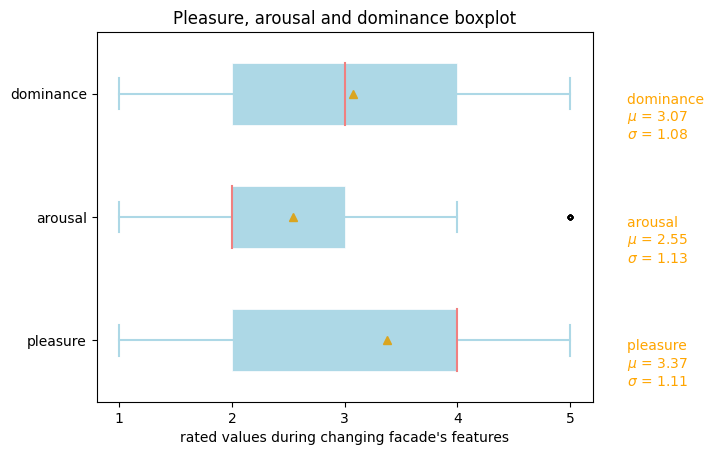

In [210]:
fig, ax=plt.subplots()

VP = ax.boxplot(afectiveResponse_df['pleasure'], positions=[1], widths=0.5, patch_artist=True, vert=False,
                showmeans=True, showfliers=True,
                medianprops={"color": "lightcoral", "linewidth": 1.5},
                boxprops={"facecolor": "lightblue", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "lightblue", "linewidth": 1.5},
                capprops={"color": "lightblue", "linewidth": 1.5},
                flierprops={"markersize":3},
                meanprops={"markeredgecolor": "goldenrod", "markerfacecolor":"goldenrod"})
stats = (f"$\\mu$ = {(afectiveResponse_df['pleasure']).mean().round(2)}\n"
         f"$\\sigma$ = {(afectiveResponse_df['pleasure']).std().round(2)}\n"
         )
ax.text(5.5,0.5,"pleasure \n"+stats, color='orange')

VP = ax.boxplot(afectiveResponse_df['arousal'], positions=[2], widths=0.5, patch_artist=True, vert=False,
                showmeans=True, showfliers=True,
                medianprops={"color": "lightcoral", "linewidth": 1.5},
                boxprops={"facecolor": "lightblue", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "lightblue", "linewidth": 1.5},
                capprops={"color": "lightblue", "linewidth": 1.5},
                flierprops={"markersize":3},
                meanprops={"markeredgecolor": "goldenrod", "markerfacecolor":"goldenrod"} )

stats = (f"$\\mu$ = {(afectiveResponse_df['arousal']).mean().round(2)}\n"
         f"$\\sigma$ = {(afectiveResponse_df['arousal']).std().round(2)}\n"
         )
ax.text(5.5,1.5,"arousal \n"+stats, color='orange')

VP = ax.boxplot(afectiveResponse_df['dominance'], positions=[3], widths=0.5, patch_artist=True, vert=False,
                showmeans=True, showfliers=True,
                medianprops={"color": "lightcoral", "linewidth": 1.5},
                boxprops={"facecolor": "lightblue", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "lightblue", "linewidth": 1.5},
                capprops={"color": "lightblue", "linewidth": 1.5},
                flierprops={"markersize":3},
                meanprops={"markeredgecolor": "goldenrod", "markerfacecolor":"goldenrod"} )
ax.set_xticks(np.arange(1,6,1))
ax.set_yticks([1,2,3], labels=['pleasure', 'arousal', 'dominance'])

stats = (f"$\\mu$ = {(afectiveResponse_df['dominance']).mean().round(2)}\n"
         f"$\\sigma$ = {(afectiveResponse_df['dominance']).std().round(2)}\n"
         )
ax.text(5.5,2.5,"dominance \n"+stats, color='orange')

ax.set_title("Pleasure, arousal and dominance boxplot")
ax.set_xlabel("rated values during changing facade's features")

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_participants_and_affective_response/"+ax.get_title()+'.png', dpi=600)

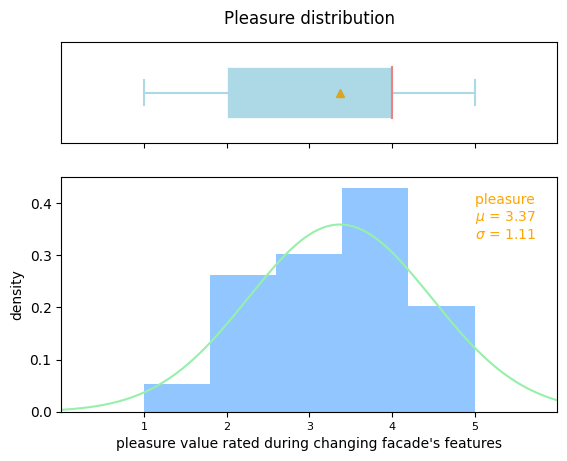

In [211]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)})
myFeature='pleasure'

#box plot - the outliers are
VP = ax_box.boxplot(afectiveResponse_df['pleasure'], positions=[1], widths=0.5, patch_artist=True, vert=False,
                showmeans=True, showfliers=True,
                medianprops={"color": "lightcoral", "linewidth": 1.5},
                boxprops={"facecolor": "lightblue", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "lightblue", "linewidth": 1.5},
                capprops={"color": "lightblue", "linewidth": 1.5},
                flierprops={"markersize":3},
                meanprops={"markeredgecolor": "goldenrod", "markerfacecolor":"goldenrod"})
stats = (f"$\\mu$ = {(afectiveResponse_df['pleasure']).mean().round(2)}\n"
         f"$\\sigma$ = {(afectiveResponse_df['pleasure']).std().round(2)}\n"
         )
ax_hist.text(5,0.3,"pleasure \n"+stats, color='orange')

ax_box.set_yticks(np.arange(0,0))
ax_box.set_xticks(np.arange(1,6,1))
ax_box.set_xlim(0,6)

#histogram plot
n, bins, patches=ax_hist.hist(afectiveResponse_df[myFeature], bins=5, density=True, cumulative=False)
#ax_hist.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())

#myKde=(afectiveResponse_df[myFeature]).plot.kde()


# add text box for the statistics
stats = (f"$\\mu$ = {(afectiveResponse_df[myFeature]).mean().round(2)}\n"
         f"$\\sigma$ = {(afectiveResponse_df[myFeature]).std().round(2)}\n"
         )
#ax_hist.text(10,0.1,stats, color='orange')

ax_hist.set_xlabel(myFeature+" value rated during changing facade's features", fontsize=10)
ax_hist.set_ylabel("density", fontsize=10)
plt.setp(ax_hist.get_xticklabels(), fontsize=8)
ax_hist.set_title("Pleasure distribution", y=1, pad=110)

from scipy.stats import norm
x_axis=np.arange(0,8,0.01)
ax_hist.plot(x_axis, norm.pdf(x_axis, (afectiveResponse_df[myFeature]).mean(), (afectiveResponse_df[myFeature]).std()))
#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_participants_and_affective_response/"+ax_hist.get_title()+'.png', dpi=600, bbox_inches='tight')

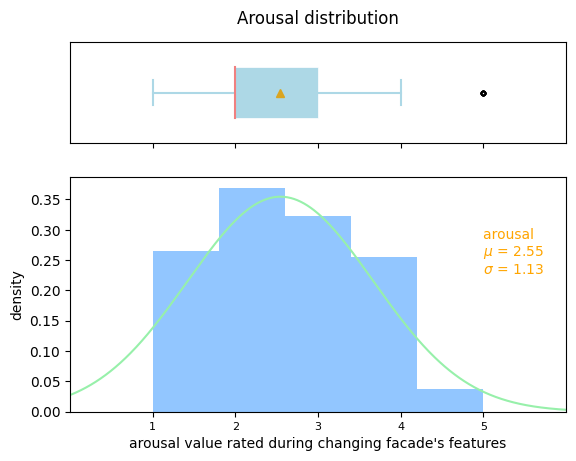

In [212]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)})
myFeature='arousal'

#box plot - the outliers are
VP = ax_box.boxplot(afectiveResponse_df[myFeature], positions=[1], widths=0.5, patch_artist=True, vert=False,
                showmeans=True, showfliers=True,
                medianprops={"color": "lightcoral", "linewidth": 1.5},
                boxprops={"facecolor": "lightblue", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "lightblue", "linewidth": 1.5},
                capprops={"color": "lightblue", "linewidth": 1.5},
                flierprops={"markersize":3},
                meanprops={"markeredgecolor": "goldenrod", "markerfacecolor":"goldenrod"})
stats = (f"$\\mu$ = {(afectiveResponse_df[myFeature]).mean().round(2)}\n"
         f"$\\sigma$ = {(afectiveResponse_df[myFeature]).std().round(2)}\n"
         )
ax_hist.text(5,0.2,"arousal \n"+stats, color='orange')

ax_box.set_yticks(np.arange(0,0))
ax_box.set_xticks(np.arange(1,6,1))
ax_box.set_xlim(0,6)

#histogram plot
n, bins, patches=ax_hist.hist(afectiveResponse_df[myFeature], bins=5, density=True, cumulative=False)
#ax_hist.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())

#myKde=(afectiveResponse_df[myFeature]).plot.kde()


# add text box for the statistics
stats = (f"$\\mu$ = {(afectiveResponse_df[myFeature]).mean().round(2)}\n"
         f"$\\sigma$ = {(afectiveResponse_df[myFeature]).std().round(2)}\n"
         )
#ax_hist.text(10,0.1,stats, color='orange')

ax_hist.set_xlabel(myFeature+" value rated during changing facade's features", fontsize=10)
ax_hist.set_ylabel("density", fontsize=10)
plt.setp(ax_hist.get_xticklabels(), fontsize=8)
ax_hist.set_title("Arousal distribution", y=1, pad=110)

from scipy.stats import norm
x_axis=np.arange(0,8,0.01)
ax_hist.plot(x_axis, norm.pdf(x_axis, (afectiveResponse_df[myFeature]).mean(), (afectiveResponse_df[myFeature]).std()))
#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_participants_and_affective_response/"+ax_hist.get_title()+'.png', dpi=600, bbox_inches='tight')

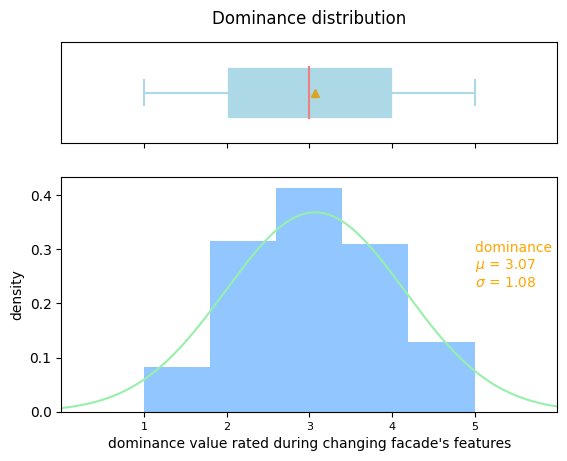

In [213]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)})
myFeature='dominance'

#box plot - the outliers are
VP = ax_box.boxplot(afectiveResponse_df[myFeature], positions=[1], widths=0.5, patch_artist=True, vert=False,
                showmeans=True, showfliers=True,
                medianprops={"color": "lightcoral", "linewidth": 1.5},
                boxprops={"facecolor": "lightblue", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "lightblue", "linewidth": 1.5},
                capprops={"color": "lightblue", "linewidth": 1.5},
                flierprops={"markersize":3},
                meanprops={"markeredgecolor": "goldenrod", "markerfacecolor":"goldenrod"})
stats = (f"$\\mu$ = {(afectiveResponse_df[myFeature]).mean().round(2)}\n"
         f"$\\sigma$ = {(afectiveResponse_df[myFeature]).std().round(2)}\n"
         )
ax_hist.text(5,0.2,"dominance \n"+stats, color='orange')

ax_box.set_yticks(np.arange(0,0))
ax_box.set_xticks(np.arange(1,6,1))
ax_box.set_xlim(0,6)

#histogram plot
n, bins, patches=ax_hist.hist(afectiveResponse_df[myFeature], bins=5, density=True, cumulative=False)
#ax_hist.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())

#myKde=(afectiveResponse_df[myFeature]).plot.kde()


# add text box for the statistics
stats = (f"$\\mu$ = {(afectiveResponse_df[myFeature]).mean().round(2)}\n"
         f"$\\sigma$ = {(afectiveResponse_df[myFeature]).std().round(2)}\n"
         )
#ax_hist.text(10,0.1,stats, color='orange')

ax_hist.set_xlabel(myFeature+" value rated during changing facade's features", fontsize=10)
ax_hist.set_ylabel("density", fontsize=10)
plt.setp(ax_hist.get_xticklabels(), fontsize=8)
ax_hist.set_title("Dominance distribution", y=1, pad=110)

from scipy.stats import norm
x_axis=np.arange(0,8,0.01)
ax_hist.plot(x_axis, norm.pdf(x_axis, (afectiveResponse_df[myFeature]).mean(), (afectiveResponse_df[myFeature]).std()))

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_participants_and_affective_response/"+ax_hist.get_title()+'.png', dpi=600, bbox_inches='tight')

# Statistical tests

In [214]:
my_df=raw_df

## ANOVA

ANOVA grouped by gender

In [215]:
my_df=my_df.rename(columns={'Age group': 'AgeGroup'})
my_df.head(5)

,pleasure,arousal,dominance,speed,nrCircles,noOfSpots,spotsPosition,spotRadius,nrOfCurrentSequence,nameOfCurrentSequence,myTime,myFrameNumber,actualTime,actualFrameNumber,Name,AgeGroup,Nationality,Gender,allocatedTimeForRating
0,4,4,3,0.010000,1,1,0,0.600000,0,initial mood,11.78,589,266.78,13339,Lasse Weyergang Rahbek,1,danish,2,266.78
1,4,4,3,1.460931,3,10,0,0.400000,2,random 2,34.70,1735,361.52,18076,Lasse Weyergang Rahbek,1,danish,2,94.74
2,3,3,2,5.000000,3,8,0,0.600000,3,high speed few spots,53.00,2650,444.56,22228,Lasse Weyergang Rahbek,1,danish,2,83.04
3,5,1,4,0.200000,3,50,0,0.600000,4,medium speed high nr of spots,61.44,3072,476.04,23802,Lasse Weyergang Rahbek,1,danish,2,31.48
4,2,4,2,0.200000,3,5,0,0.650001,5,explosion with big radius,77.18,3859,493.26,24663,Lasse Weyergang Rahbek,1,danish,2,17.22


In [216]:
groups=pd.unique(my_df.Gender.values)
from scipy import stats
f,p=stats.f_oneway(my_df[my_df['AgeGroup']==0]['pleasure'], my_df[my_df['AgeGroup']==1]['pleasure'], my_df[my_df['AgeGroup']==2]['pleasure'])
print(f, p)

#statsmodel
my_model=smf.ols(formula='pleasure ~ C(AgeGroup, Sum)', data=my_df)
my_model_fit=my_model.fit()

print("\n summary of linear regression")
print(my_model_fit.summary())

print("\n anova table")
anova_table=sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

my_model_fit
anova_table

0.9237904188147809 0.3977747563024112

 summary of linear regression
                            OLS Regression Results                            
Dep. Variable:               pleasure   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9238
Date:                Thu, 18 Apr 2024   Prob (F-statistic):              0.398
Time:                        12:20:05   Log-Likelihood:                -663.45
No. Observations:                 446   AIC:                             1333.
Df Residuals:                     443   BIC:                             1345.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

,sum_sq,df,F,PR(>F)
"C(AgeGroup, Sum)",2.133673,2.0,0.92379,0.397775
Residual,511.597268,443.0,NaN,NaN


In [217]:
stats.f.ppf(q=1-.05, dfn=2, dfd=444)

3.016036138818545

## Normality check

Text(0.5, 1.0, 'Normality check for pleasure')

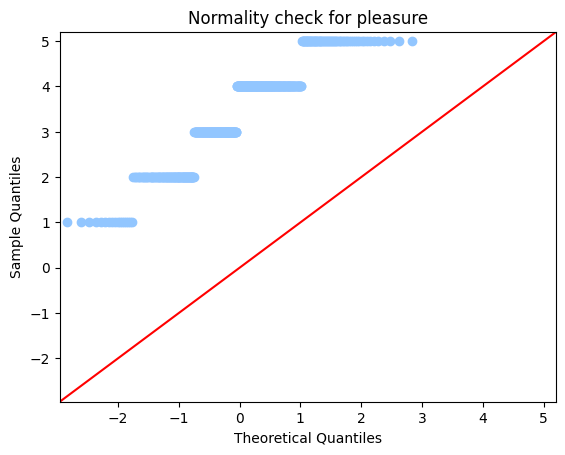

In [218]:
sm.qqplot(my_df['pleasure'], line='45')
plt.title('Normality check for pleasure')

#fig.savefig("/content/drive/MyDrive/Plots/"+'Normality check for pleasure'+'.png', dpi=600, bbox_inches='tight')

Text(0.5, 1.0, 'Normality check for arousal')

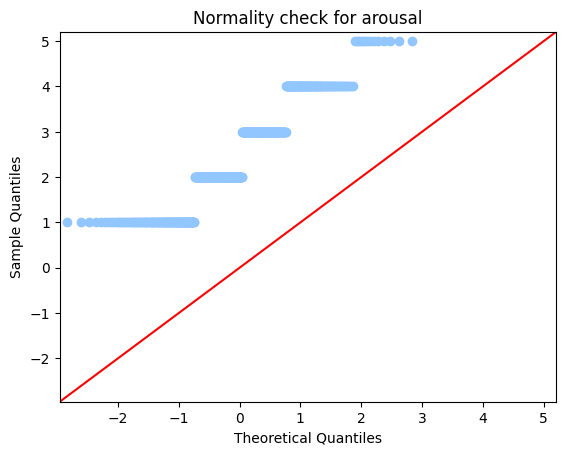

In [219]:
sm.qqplot(my_df['arousal'], line='45')
plt.title('Normality check for arousal')

#fig.savefig("/content/drive/MyDrive/Plots/"+'Normality check for arousal'+'.png', dpi=600, bbox_inches='tight')

Text(0.5, 1.0, 'Normality check for dominance')

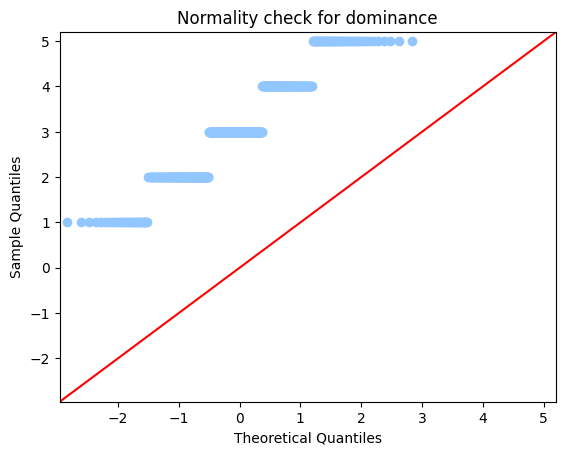

In [220]:
sm.qqplot(my_df['dominance'], line='45')
plt.title('Normality check for dominance')

#fig.savefig("/content/drive/MyDrive/Plots/"+'Normality check for dominance'+'.png', dpi=600, bbox_inches='tight')

## n-way ANOVA

### n-way ANOVA for pleasure

In [221]:
#statsmodel
my_model_fit=smf.ols(formula='pleasure ~ C(Gender)', data=my_df).fit()
print("\nANOVA table \nDependent variable: pleasure \nnull Hypothesis H0: data is similar (means are similar) \nIf p<0.05, reject H0 and accept H1: significant difference in data.\n")
anova_table=sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)


ANOVA table 
Dependent variable: pleasure 
null Hypothesis H0: data is similar (means are similar) 
If p<0.05, reject H0 and accept H1: significant difference in data.

               sum_sq     df         F    PR(>F)
C(Gender)    3.641546    1.0  3.169732  0.075698
Residual   510.089395  444.0       NaN       NaN


In [222]:
#statsmodel
my_model_fit=smf.ols(formula='pleasure ~ C(AgeGroup)*C(Gender)', data=my_df).fit()
print("\nANOVA table \nDependent variable: pleasure \nnull Hypothesis H0: data is similar (means are similar) \nIf p<0.05, reject H0 and accept H1: significant difference in data.\n")
anova_table=sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

#save to csv
#anova_table.to_csv("/content/drive/MyDrive/Plots/Tables/Statistical tests/"+
#                   "ANOVA table - pleasure - AgeGroup and Gender"+
#                   ".csv")

anova_table


ANOVA table 
Dependent variable: pleasure 
null Hypothesis H0: data is similar (means are similar) 
If p<0.05, reject H0 and accept H1: significant difference in data.

                           sum_sq     df         F    PR(>F)
C(AgeGroup)              1.158965    2.0  0.503696  0.604641
C(Gender)                2.666838    1.0  2.318061  0.128598
C(AgeGroup):C(Gender)    2.727676    2.0  1.185471  0.306576
Residual               506.202754  440.0       NaN       NaN


,sum_sq,df,F,PR(>F)
C(AgeGroup),1.158965,2.0,0.503696,0.604641
C(Gender),2.666838,1.0,2.318061,0.128598
C(AgeGroup):C(Gender),2.727676,2.0,1.185471,0.306576
Residual,506.202754,440.0,NaN,NaN


In [223]:
#statsmodel
my_model_fit=smf.ols(formula='pleasure ~ C(Nationality)', data=my_df).fit()
print("\nANOVA table \nDependent variable: pleasure \nnull Hypothesis H0: data is similar (means are similar) \nIf p<0.05, reject H0 and accept H1: significant difference in data.\n")
anova_table=sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)


ANOVA table 
Dependent variable: pleasure 
null Hypothesis H0: data is similar (means are similar) 
If p<0.05, reject H0 and accept H1: significant difference in data.

                    sum_sq     df         F    PR(>F)
C(Nationality)   23.864785    9.0  2.360066  0.013079
Residual        489.866156  436.0       NaN       NaN


Test for time allocated for rating - not sure if relevant

In [224]:
#statsmodel
my_model_fit=smf.ols(formula='pleasure ~ allocatedTimeForRating', data=my_df).fit()
print("\nANOVA table \nDependent variable: pleasure \nnull Hypothesis H0: data is similar (means are similar) \nIf p<0.05, reject H0 and accept H1: significant difference in data.\n")
anova_table=sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)


ANOVA table 
Dependent variable: pleasure 
null Hypothesis H0: data is similar (means are similar) 
If p<0.05, reject H0 and accept H1: significant difference in data.

                            sum_sq     df          F    PR(>F)
allocatedTimeForRating   11.734344    1.0  10.378654  0.001369
Residual                501.996597  444.0        NaN       NaN


### n-way ANOVA for arousal

In [225]:
#statsmodel
my_model_fit=smf.ols(formula='arousal ~ C(Gender)', data=my_df).fit()
print("\nANOVA table \nDependent variable: arousal \nnull Hypothesis H0: data is similar (means are similar) \nIf p<0.05, reject H0 and accept H1: significant difference in data.\n")
anova_table=sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)


ANOVA table 
Dependent variable: arousal 
null Hypothesis H0: data is similar (means are similar) 
If p<0.05, reject H0 and accept H1: significant difference in data.

               sum_sq     df        F    PR(>F)
C(Gender)    6.500455    1.0  5.16324  0.023547
Residual   558.990576  444.0      NaN       NaN


In [226]:
#statsmodel
my_model_fit=smf.ols(formula='arousal ~ C(AgeGroup)*C(Gender)', data=my_df).fit()
print("\nANOVA table \nDependent variable: arousal \nnull Hypothesis H0: data is similar (means are similar) \nIf p<0.05, reject H0 and accept H1: significant difference in data.\n")
anova_table=sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)


ANOVA table 
Dependent variable: arousal 
null Hypothesis H0: data is similar (means are similar) 
If p<0.05, reject H0 and accept H1: significant difference in data.

                           sum_sq     df         F    PR(>F)
C(AgeGroup)              5.911552    2.0  2.366982  0.094956
C(Gender)                5.509894    1.0  4.412317  0.036249
C(AgeGroup):C(Gender)    3.627748    2.0  1.452548  0.235093
Residual               549.451277  440.0       NaN       NaN


In [227]:
#statsmodel
my_model_fit=smf.ols(formula='arousal ~ C(Nationality)', data=my_df).fit()
print("\nANOVA table \nDependent variable: arousal \nnull Hypothesis H0: data is similar (means are similar) \nIf p<0.05, reject H0 and accept H1: significant difference in data.\n")
anova_table=sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)


ANOVA table 
Dependent variable: arousal 
null Hypothesis H0: data is similar (means are similar) 
If p<0.05, reject H0 and accept H1: significant difference in data.

                    sum_sq     df         F    PR(>F)
C(Nationality)   29.812002    9.0  2.696066  0.004626
Residual        535.679029  436.0       NaN       NaN


### n-way ANOVA for dominance

In [228]:
#statsmodel
my_model_fit=smf.ols(formula='dominance ~ C(Gender)', data=my_df).fit()
print("\nANOVA table \nDependent variable: dominance \nnull Hypothesis H0: data is similar (means are similar) \nIf p<0.05, reject H0 and accept H1: significant difference in data.\n")
anova_table=sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)


ANOVA table 
Dependent variable: dominance 
null Hypothesis H0: data is similar (means are similar) 
If p<0.05, reject H0 and accept H1: significant difference in data.

               sum_sq     df          F        PR(>F)
C(Gender)   29.588030    1.0  26.270431  4.437560e-07
Residual   500.071163  444.0        NaN           NaN


In [229]:
#statsmodel
my_model_fit=smf.ols(formula='dominance ~ C(AgeGroup)*C(Gender)', data=my_df).fit()
print("\nANOVA table \nDependent variable: dominance \nnull Hypothesis H0: data is similar (means are similar) \nIf p<0.05, reject H0 and accept H1: significant difference in data.\n")
anova_table=sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)


ANOVA table 
Dependent variable: dominance 
null Hypothesis H0: data is similar (means are similar) 
If p<0.05, reject H0 and accept H1: significant difference in data.

                           sum_sq     df          F    PR(>F)
C(AgeGroup)              2.813062    2.0   1.248472  0.287957
C(Gender)               26.377939    1.0  23.413717  0.000002
C(AgeGroup):C(Gender)    1.553251    2.0   0.689352  0.502442
Residual               495.704850  440.0        NaN       NaN


In [230]:
#statsmodel
my_model_fit=smf.ols(formula='dominance ~ C(Nationality)', data=my_df).fit()
print("\nANOVA table \nDependent variable: dominance \nnull Hypothesis H0: data is similar (means are similar) \nIf p<0.05, reject H0 and accept H1: significant difference in data.\n")
anova_table=sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)


ANOVA table 
Dependent variable: dominance 
null Hypothesis H0: data is similar (means are similar) 
If p<0.05, reject H0 and accept H1: significant difference in data.

                    sum_sq     df         F    PR(>F)
C(Nationality)   41.500201    9.0  4.118441  0.000042
Residual        488.158991  436.0       NaN       NaN


## chi-square test

### Gender test

In [231]:
from scipy.stats import chi2_contingency

contingency_table=pd.crosstab(my_df['Gender'],my_df['pleasure'])
contingency_table
chi_test=chi2_contingency(contingency_table)
print("Chi-square test for gender and pleasure: \nH0: Variables do not have a significant relation (expected frequences) \nIf p<0.05, reject H0.\n")
print(chi_test)


Chi-square test for gender and pleasure: 
H0: Variables do not have a significant relation (expected frequences) 
If p<0.05, reject H0.

Chi2ContingencyResult(statistic=5.275148573620422, pvalue=0.26021235481655863, dof=4, expected_freq=array([[ 7.28026906, 35.97309417, 48.39237668, 70.23318386, 29.12107623],
       [ 9.71973094, 48.02690583, 64.60762332, 93.76681614, 38.87892377]]))


In [232]:
from scipy.stats import chi2_contingency

contingency_table=pd.crosstab(my_df['Gender'],my_df['arousal'])
contingency_table
chi_test=chi2_contingency(contingency_table)
print("Chi-square test for gender and arousal: \nH0: Variables do not have a significant relation (expected frequences) \nIf p<0.05, reject H0.\n")
print(chi_test)

Chi-square test for gender and arousal: 
H0: Variables do not have a significant relation (expected frequences) 
If p<0.05, reject H0.

Chi2ContingencyResult(statistic=12.285530680798638, pvalue=0.015349608096412837, dof=4, expected_freq=array([[43.68161435, 55.24439462, 49.67713004, 36.82959641,  5.56726457],
       [58.31838565, 73.75560538, 66.32286996, 49.17040359,  7.43273543]]))


In [233]:
from scipy.stats import chi2_contingency

contingency_table=pd.crosstab(my_df['Gender'],my_df['dominance'])
contingency_table
chi_test=chi2_contingency(contingency_table)
print("Chi-square test for gender and dominance: \nH0: Variables do not have a significant relation (expected frequences) \nIf p<0.05, reject H0.\n")
print(chi_test)

contingency_table

Chi-square test for gender and dominance: 
H0: Variables do not have a significant relation (expected frequences) 
If p<0.05, reject H0.

Chi2ContingencyResult(statistic=25.439158937188548, pvalue=4.104853143470651e-05, dof=4, expected_freq=array([[12.41928251, 45.82286996, 65.0941704 , 45.82286996, 21.84080717],
       [16.58071749, 61.17713004, 86.9058296 , 61.17713004, 29.15919283]]))


dominance,1,2,3,4,5
Gender,,,,,
1,18,58,70,34,11
2,11,49,82,73,40


### Nationality test

Nationality test not good for chi-square test because the frequences of some groups are less than 5. The correct analysis can be seen after the changes in Nationality gropus.

In [234]:
from scipy.stats import chi2_contingency

contingency_table=pd.crosstab(my_df['Nationality'],my_df['pleasure'])
contingency_table
chi_test=chi2_contingency(contingency_table)
print("Chi-square test for nationality and pleasure: \nH0: Variables do not have a significant relation (expected frequences) \nIf p<0.05, reject H0.\n")
print(chi_test)

Chi-square test for nationality and pleasure: 
H0: Variables do not have a significant relation (expected frequences) 
If p<0.05, reject H0.

Chi2ContingencyResult(statistic=53.45387240008707, pvalue=0.03065903450381553, dof=36, expected_freq=array([[ 0.64798206,  3.20179372,  4.30717489,  6.25112108,  2.59192825],
       [ 3.23991031, 16.00896861, 21.53587444, 31.25560538, 12.95964126],
       [ 8.34753363, 41.24663677, 55.48654709, 80.52914798, 33.39013453],
       [ 0.64798206,  3.20179372,  4.30717489,  6.25112108,  2.59192825],
       [ 0.64798206,  3.20179372,  4.30717489,  6.25112108,  2.59192825],
       [ 0.64798206,  3.20179372,  4.30717489,  6.25112108,  2.59192825],
       [ 0.64798206,  3.20179372,  4.30717489,  6.25112108,  2.59192825],
       [ 0.57174888,  2.82511211,  3.80044843,  5.51569507,  2.28699552],
       [ 1.29596413,  6.40358744,  8.61434978, 12.50224215,  5.1838565 ],
       [ 0.30493274,  1.50672646,  2.02690583,  2.94170404,  1.21973094]]))


### Age Group test

In [235]:
from scipy.stats import chi2_contingency

contingency_table=pd.crosstab(my_df['AgeGroup'],my_df['pleasure'])
contingency_table
chi_test=chi2_contingency(contingency_table)
print("Chi-square test for age group and pleasure: \nH0: Variables do not have a significant relation (expected frequences) \nIf p<0.05, reject H0.\n")
print(chi_test)

contingency_table

Chi-square test for age group and pleasure: 
H0: Variables do not have a significant relation (expected frequences) 
If p<0.05, reject H0.

Chi2ContingencyResult(statistic=13.797619027838879, pvalue=0.08719531141071823, dof=8, expected_freq=array([[  4.11659193,  20.34080717,  27.3632287 ,  39.71300448,
         16.46636771],
       [ 11.01569507,  54.43049327,  73.22197309, 106.2690583 ,
         44.06278027],
       [  1.867713  ,   9.22869955,  12.41479821,  18.01793722,
          7.47085202]]))


pleasure,1,2,3,4,5
AgeGroup,,,,,
0,3,18,34,43,10
1,13,55,61,108,52
2,1,11,18,13,6


In [236]:
from scipy.stats import chi2_contingency

contingency_table=pd.crosstab(my_df['AgeGroup'],my_df['arousal'])
contingency_table
chi_test=chi2_contingency(contingency_table)
print("Chi-square test for age group and arousal: \nH0: Variables do not have a significant relation (expected frequences) \nIf p<0.05, reject H0.\n")
print(chi_test)

Chi-square test for age group and arousal: 
H0: Variables do not have a significant relation (expected frequences) 
If p<0.05, reject H0.

Chi2ContingencyResult(statistic=27.365140907776848, pvalue=0.0006113117745690543, dof=8, expected_freq=array([[24.69955157, 31.23766816, 28.0896861 , 20.82511211,  3.14798206],
       [66.0941704 , 83.5896861 , 75.16591928, 55.7264574 ,  8.42376682],
       [11.20627803, 14.17264574, 12.74439462,  9.44843049,  1.42825112]]))


In [237]:
from scipy.stats import chi2_contingency

contingency_table=pd.crosstab(my_df['AgeGroup'],my_df['dominance'])
contingency_table
chi_test=chi2_contingency(contingency_table)
print("Chi-square test for age group and dominance: \nH0: Variables do not have a significant relation (expected frequences) \nIf p<0.05, reject H0.\n")
print(chi_test)

Chi-square test for age group and dominance: 
H0: Variables do not have a significant relation (expected frequences) 
If p<0.05, reject H0.

Chi2ContingencyResult(statistic=12.903139569702764, pvalue=0.11522601197844672, dof=8, expected_freq=array([[ 7.02242152, 25.9103139 , 36.80717489, 25.9103139 , 12.34977578],
       [18.79147982, 69.33408072, 98.49327354, 69.33408072, 33.0470852 ],
       [ 3.18609865, 11.75560538, 16.69955157, 11.75560538,  5.60313901]]))


## Boxplot means difference check

Text(0.5, 1.0, 'Boxplot for affective response by nationality (breakdown)')

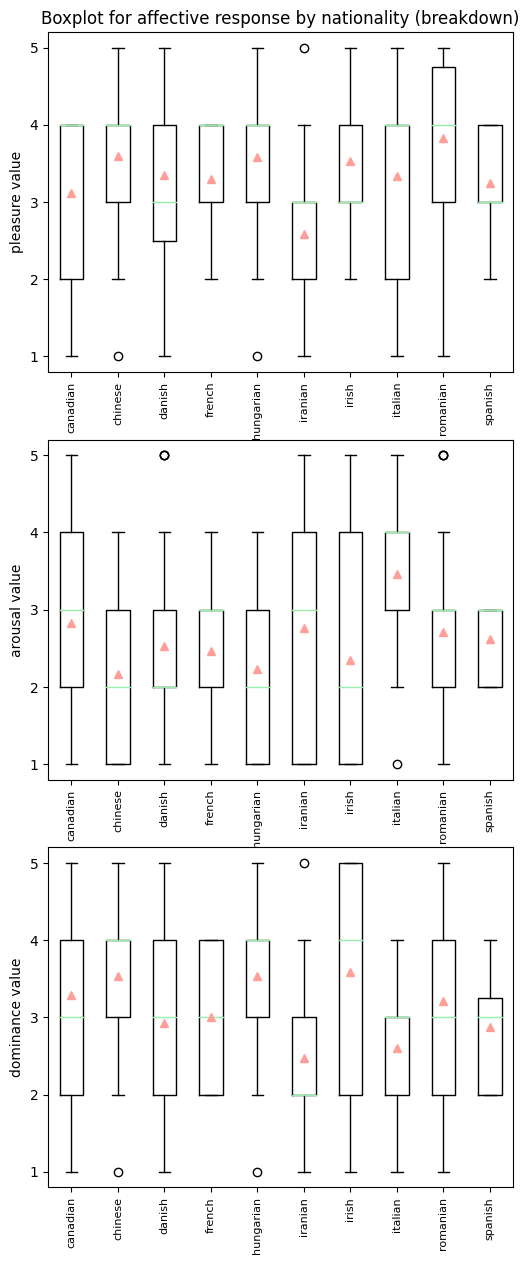

In [238]:
fig, ax=plt.subplots(3,1, figsize=(6,15))

grouped_df=my_df.groupby('Nationality')['pleasure']
boxplot=ax[0].boxplot(x=[group.values for name, group in grouped_df],
                   labels=grouped_df.groups.keys(), showmeans=True)
ex=plt.setp(ax[0].get_xticklabels(), rotation=90, fontsize=8 )
ax[0].set_ylabel("pleasure value")

grouped_df=my_df.groupby('Nationality')['arousal']
boxplot=ax[1].boxplot(x=[group.values for name, group in grouped_df],
                   labels=grouped_df.groups.keys(), showmeans=True)
ex=plt.setp(ax[1].get_xticklabels(), rotation=90, fontsize=8 )
ax[1].set_ylabel("arousal value")

grouped_df=my_df.groupby('Nationality')['dominance']
boxplot=ax[2].boxplot(x=[group.values for name, group in grouped_df],
                   labels=grouped_df.groups.keys(), showmeans=True)
ex=plt.setp(ax[2].get_xticklabels(), rotation=90, fontsize=8 )
ax[2].set_ylabel("dominance value")

ax[0].set_yticks(np.arange(1,6,1))
ax[1].set_yticks(np.arange(1,6,1))
ax[2].set_yticks(np.arange(1,6,1))

ax[0].set_title("Boxplot for affective response by nationality (breakdown)")
#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_participants_and_affective_response/"+ax[0].get_title()+'.png', dpi=600, bbox_inches='tight')

Text(0.5, 1.0, 'Boxplot for affective response by Gender')

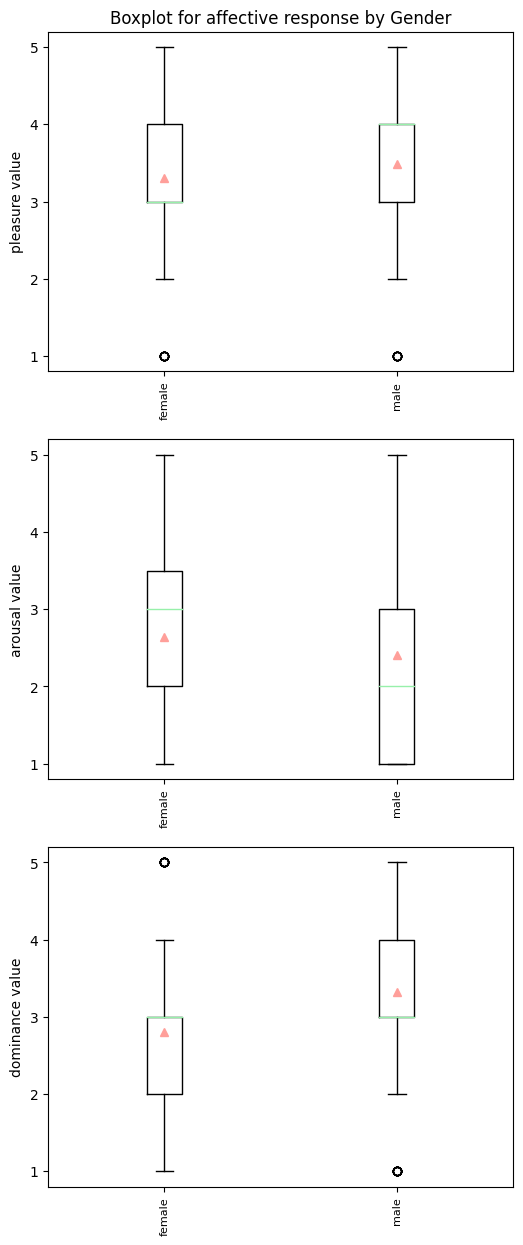

In [239]:
grouped_df=my_df.groupby('Gender')['pleasure']

fig, ax=plt.subplots(3,1, figsize=(6,15))

boxplot=ax[0].boxplot(x=[group.values for name, group in grouped_df],
                   labels=grouped_df.groups.keys(), showmeans=True)
ex=plt.setp(ax[0].get_xticklabels(), rotation=90, fontsize=8 )
ax[0].set_ylabel("pleasure value")
ax[0].set_xticks([1,2], ['female', 'male'])

grouped_df=my_df.groupby('Gender')['arousal']
boxplot=ax[1].boxplot(x=[group.values for name, group in grouped_df],
                   labels=grouped_df.groups.keys(), showmeans=True)
ex=plt.setp(ax[1].get_xticklabels(), rotation=90, fontsize=8 )
ax[1].set_ylabel("arousal value")
ax[1].set_xticks([1,2], ['female', 'male'])

grouped_df=my_df.groupby('Gender')['dominance']
boxplot=ax[2].boxplot(x=[group.values for name, group in grouped_df],
                   labels=grouped_df.groups.keys(), showmeans=True)
ex=plt.setp(ax[2].get_xticklabels(), rotation=90, fontsize=8 )
ax[2].set_ylabel("dominance value")
ax[2].set_xticks([1,2], ['female', 'male'])

ax[0].set_yticks(np.arange(1,6,1))
ax[1].set_yticks(np.arange(1,6,1))
ax[2].set_yticks(np.arange(1,6,1))

ax[0].set_title("Boxplot for affective response by Gender")
#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_participants_and_affective_response/"+ax[0].get_title()+'.png', dpi=600, bbox_inches='tight')

Text(0.5, 1.0, 'Boxplot for affective response by age group')

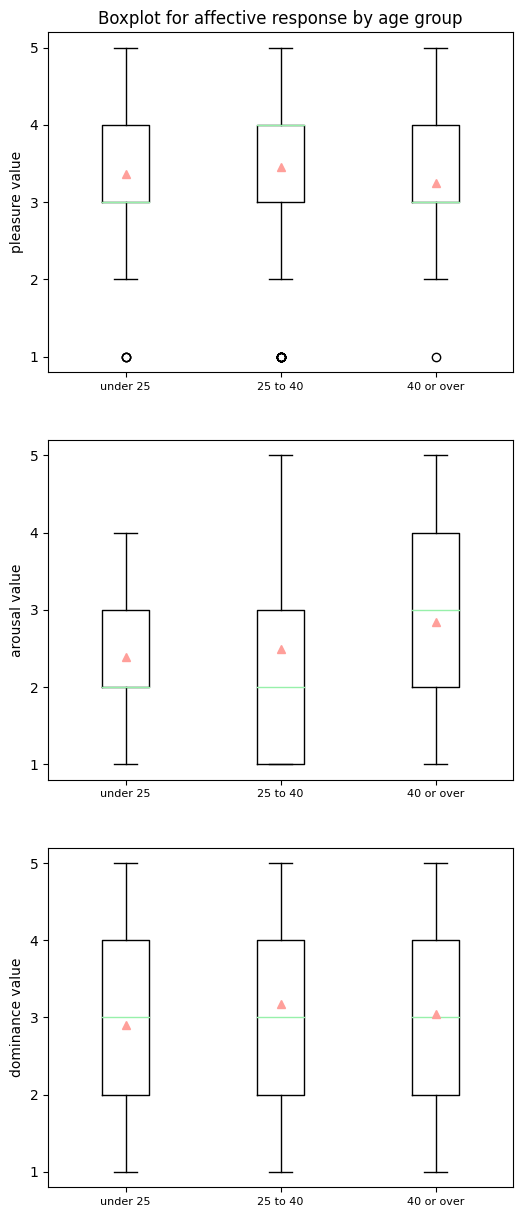

In [240]:
grouped_df=my_df.groupby('AgeGroup')['pleasure']

fig, ax=plt.subplots(3,1, figsize=(6,15))

boxplot=ax[0].boxplot(x=[group.values for name, group in grouped_df],
                   labels=grouped_df.groups.keys(), showmeans=True)
ex=plt.setp(ax[0].get_xticklabels(), rotation=0, fontsize=8 )
ax[0].set_ylabel("pleasure value")
ax[0].set_xticks([1,2,3], labels=['under 25', '25 to 40', '40 or over'])

grouped_df=my_df.groupby('AgeGroup')['arousal']
boxplot=ax[1].boxplot(x=[group.values for name, group in grouped_df],
                   labels=grouped_df.groups.keys(), showmeans=True)
ex=plt.setp(ax[1].get_xticklabels(), rotation=0, fontsize=8 )
ax[1].set_ylabel("arousal value")
ax[1].set_xticks([1,2,3], labels=['under 25', '25 to 40', '40 or over'])

grouped_df=my_df.groupby('AgeGroup')['dominance']
boxplot=ax[2].boxplot(x=[group.values for name, group in grouped_df],
                   labels=grouped_df.groups.keys(), showmeans=True)
ex=plt.setp(ax[2].get_xticklabels(), rotation=0, fontsize=8 )
ax[2].set_ylabel("dominance value")
ax[2].set_xticks([1,2,3], labels=['under 25', '25 to 40', '40 or over'])

ax[0].set_yticks(np.arange(1,6,1))
ax[1].set_yticks(np.arange(1,6,1))
ax[2].set_yticks(np.arange(1,6,1))

ax[0].set_title("Boxplot for affective response by age group")
#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_participants_and_affective_response/"+ax[0].get_title()+'.png', dpi=600, bbox_inches='tight')

## Post hod Tukey

In [241]:
import statsmodels.stats.multicomp as smm

one_tukey_smm = smm.pairwise_tukeyhsd(endog=my_df['pleasure'],groups=my_df['Nationality'],alpha=0.05)

print("Tukey test. H0: the means of the groups are equal")
print(one_tukey_smm)

Tukey test. H0: the means of the groups are equal
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
 canadian   chinese   0.4824 0.7879 -0.4133   1.378  False
 canadian    danish    0.234 0.9971 -0.6148  1.0827  False
 canadian    french   0.1765    1.0 -0.9798  1.3327  False
 canadian hungarian   0.4706 0.9546 -0.6856  1.6268  False
 canadian   iranian  -0.5294 0.9083 -1.6856  0.6268  False
 canadian     irish   0.4118 0.9811 -0.7445   1.568  False
 canadian   italian   0.2157 0.9999 -0.9785  1.4098  False
 canadian  romanian   0.7059 0.4297 -0.2954  1.7072  False
 canadian   spanish   0.1324    1.0 -1.3129  1.5776  False
  chinese    danish  -0.2484 0.7133 -0.6792  0.1824  False
  chinese    french  -0.3059 0.9859 -1.2015  0.5897  False
  chinese hungarian  -0.0118    1.0 -0.9074  0.8838  False
  chinese   iranian  -1.0118 0.0133 -1.9074 -0.1162   True
  chin

In [242]:
import statsmodels.stats.multicomp as smm

one_tukey_smm = smm.pairwise_tukeyhsd(endog=my_df['arousal'],groups=my_df['Nationality'],alpha=0.05)

print("Tukey test. H0: the means of the groups are equal")
print(one_tukey_smm)

Tukey test. H0: the means of the groups are equal
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
 canadian   chinese  -0.6588 0.4329 -1.5954 0.2777  False
 canadian    danish  -0.2984 0.9873 -1.1859 0.5891  False
 canadian    french  -0.3529 0.9955  -1.562 0.8561  False
 canadian hungarian  -0.5882 0.8721 -1.7973 0.6208  False
 canadian   iranian  -0.0588    1.0 -1.2679 1.1503  False
 canadian     irish  -0.4706 0.9659 -1.6797 0.7385  False
 canadian   italian   0.6431 0.8288 -0.6056 1.8919  False
 canadian  romanian  -0.1176    1.0 -1.1647 0.9294  False
 canadian   spanish  -0.1985    1.0 -1.7099 1.3128  False
  chinese    danish   0.3604  0.248 -0.0901 0.8109  False
  chinese    french   0.3059 0.9897 -0.6307 1.2424  False
  chinese hungarian   0.0706    1.0  -0.866 1.0071  False
  chinese   iranian      0.6  0.573 -0.3366 1.5366  False
  chinese     irish   

In [243]:
import statsmodels.stats.multicomp as smm

one_tukey_smm = smm.pairwise_tukeyhsd(endog=my_df['dominance'],groups=my_df['Nationality'],alpha=0.05)

print("Tukey test. H0: the means of the groups are equal")
print(one_tukey_smm)

pd.DataFrame(data=one_tukey_smm._results_table.data[1:], columns=one_tukey_smm._results_table.data[0])

Tukey test. H0: the means of the groups are equal
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
 canadian   chinese   0.2353  0.998 -0.6588  1.1293  False
 canadian    danish  -0.3672 0.9334 -1.2144  0.4801  False
 canadian    french  -0.2941 0.9984 -1.4483  0.8601  False
 canadian hungarian   0.2353 0.9997 -0.9189  1.3895  False
 canadian   iranian  -0.8235 0.4114 -1.9777  0.3307  False
 canadian     irish   0.2941 0.9984 -0.8601  1.4483  False
 canadian   italian  -0.6941 0.7015 -1.8862  0.4979  False
 canadian  romanian  -0.0882    1.0 -1.0878  0.9113  False
 canadian   spanish  -0.4191 0.9957 -1.8619  1.0236  False
  chinese    danish  -0.6025 0.0004 -1.0325 -0.1724   True
  chinese    french  -0.5294 0.6805 -1.4235  0.3646  False
  chinese hungarian      0.0    1.0  -0.894   0.894  False
  chinese   iranian  -1.0588 0.0072 -1.9529 -0.1648   True
  chin

,group1,group2,meandiff,p-adj,lower,upper,reject
0,canadian,chinese,0.2353,0.9980,-0.6588,1.1293,False
1,canadian,danish,-0.3672,0.9334,-1.2144,0.4801,False
2,canadian,french,-0.2941,0.9984,-1.4483,0.8601,False
3,canadian,hungarian,0.2353,0.9997,-0.9189,1.3895,False
4,canadian,iranian,-0.8235,0.4114,-1.9777,0.3307,False
5,canadian,irish,0.2941,0.9984,-0.8601,1.4483,False
6,canadian,italian,-0.6941,0.7015,-1.8862,0.4979,False
7,canadian,romanian,-0.0882,1.0000,-1.0878,0.9113,False
8,canadian,spanish,-0.4191,0.9957,-1.8619,1.0236,False
9,chinese,danish,-0.6025,0.0004,-1.0325,-0.1724,True


In [244]:
import statsmodels.stats.multicomp as smm

one_tukey_smm = smm.pairwise_tukeyhsd(endog=my_df['pleasure'],groups=my_df['Gender'],alpha=0.05)

print("Tukey test. H0: the means of the groups are equal")
print(one_tukey_smm)

Tukey test. H0: the means of the groups are equal
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2   0.1826 0.0757 -0.019 0.3842  False
--------------------------------------------------


In [245]:
import statsmodels.stats.multicomp as smm

one_tukey_smm = smm.pairwise_tukeyhsd(endog=my_df['arousal'],groups=my_df['Gender'],alpha=0.05)

print("Tukey test. H0: the means of the groups are equal")
print(one_tukey_smm)

Tukey test. H0: the means of the groups are equal
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2   -0.244 0.0235 -0.455 -0.033   True
--------------------------------------------------


In [246]:
import statsmodels.stats.multicomp as smm

one_tukey_smm = smm.pairwise_tukeyhsd(endog=my_df['dominance'],groups=my_df['Gender'],alpha=0.05)

print("Tukey test. H0: the means of the groups are equal")
print(one_tukey_smm)

pd.DataFrame(data=one_tukey_smm._results_table.data[1:], columns=one_tukey_smm._results_table.data[0])

Tukey test. H0: the means of the groups are equal
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     1      2   0.5205   0.0 0.3209 0.7201   True
-------------------------------------------------


,group1,group2,meandiff,p-adj,lower,upper,reject
0,1,2,0.5205,0.0,0.3209,0.7201,True


In [247]:
import statsmodels.stats.multicomp as smm

one_tukey_smm = smm.pairwise_tukeyhsd(endog=my_df['arousal'],groups=my_df['Name'],alpha=0.05)

print("Tukey test. H0: the means of the groups are equal")
print(one_tukey_smm)

Tukey test. H0: the means of the groups are equal
                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
           group1                       group2            meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------
     Adrian Daniel McCreadie            Alexandru Cioanca   0.2353    1.0 -1.1253  1.5959  False
     Adrian Daniel McCreadie             Ana Paula Barcia   0.2721    1.0 -1.4287  1.9728  False
     Adrian Daniel McCreadie          Andreas Kaae Astrup   1.1765  0.212 -0.1841  2.5371  False
     Adrian Daniel McCreadie Anna Elisabeth Kristoffersen  -0.2353    1.0 -1.5959  1.1253  False
     Adrian Daniel McCreadie                Anne Sørensen   0.4118    1.0 -0.9489  1.7724  False
     Adrian Daniel McCreadie                  Chang Xiong   0.0588    1.0 -1.3018  1.4194  False
     Adrian Daniel McCreadie     Dagmar Haubjerg Andersen  -0.1029    1.0 -1.

In [248]:
import statsmodels.stats.multicomp as smm

one_tukey_smm = smm.pairwise_tukeyhsd(endog=my_df['pleasure'],groups=my_df['Name'],alpha=0.05)

print("Tukey test. H0: the means of the groups are equal")
print(one_tukey_smm)

Tukey test. H0: the means of the groups are equal
                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
           group1                       group2            meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------
     Adrian Daniel McCreadie            Alexandru Cioanca   0.5882  0.997 -0.7286  1.9051  False
     Adrian Daniel McCreadie             Ana Paula Barcia  -0.2794    1.0 -1.9254  1.3666  False
     Adrian Daniel McCreadie          Andreas Kaae Astrup  -0.1176    1.0 -1.4345  1.1992  False
     Adrian Daniel McCreadie Anna Elisabeth Kristoffersen  -0.2941    1.0 -1.6109  1.0227  False
     Adrian Daniel McCreadie                Anne Sørensen  -0.6471 0.9883 -1.9639  0.6698  False
     Adrian Daniel McCreadie                  Chang Xiong  -0.0588    1.0 -1.3756   1.258  False
     Adrian Daniel McCreadie     Dagmar Haubjerg Andersen   0.3456    1.0 -0.

In [249]:
import statsmodels.stats.multicomp as smm

one_tukey_smm = smm.pairwise_tukeyhsd(endog=my_df['dominance'],groups=my_df['Name'],alpha=0.05)

print("Tukey test. H0: the means of the groups are equal")
print(one_tukey_smm)

Tukey test. H0: the means of the groups are equal
                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
           group1                       group2            meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------
     Adrian Daniel McCreadie            Alexandru Cioanca  -0.1176    1.0 -1.4188  1.1836  False
     Adrian Daniel McCreadie             Ana Paula Barcia  -0.7132 0.9977 -2.3397  0.9133  False
     Adrian Daniel McCreadie          Andreas Kaae Astrup  -0.3529    1.0 -1.6541  0.9483  False
     Adrian Daniel McCreadie Anna Elisabeth Kristoffersen  -1.4118 0.0166  -2.713 -0.1106   True
     Adrian Daniel McCreadie                Anne Sørensen  -0.7059 0.9607 -2.0071  0.5953  False
     Adrian Daniel McCreadie                  Chang Xiong  -0.3529    1.0 -1.6541  0.9483  False
     Adrian Daniel McCreadie     Dagmar Haubjerg Andersen  -0.5257 0.9995 -1.

In [250]:
import statsmodels.stats.multicomp as smm

one_tukey_smm = smm.pairwise_tukeyhsd(endog=my_df['arousal'],groups=my_df['AgeGroup'],alpha=0.05)

print("Tukey test. H0: the means of the groups are equal")
print(one_tukey_smm)

pd.DataFrame(data=one_tukey_smm._results_table.data[1:], columns=one_tukey_smm._results_table.data[0])

Tukey test. H0: the means of the groups are equal
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.1025 0.6976 -0.1954 0.4003  False
     0      2   0.4478 0.0547  -0.007 0.9027  False
     1      2   0.3454 0.1156 -0.0626 0.7533  False
---------------------------------------------------


,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,0.1025,0.6976,-0.1954,0.4003,False
1,0,2,0.4478,0.0547,-0.0070,0.9027,False
2,1,2,0.3454,0.1156,-0.0626,0.7533,False


# Participant's features changes

In [251]:
my_groups=participants_df.groupby('Nationality')
my_groups.size()
myList=[]
for name, grp in my_groups:
  print(name+"\n"+str(grp.shape[0]))
  if grp.shape[0]<=2:
    myList.append(name)

print(myList)

my_df=my_df.replace(to_replace=myList, value="other")

canadian
1
chinese
5
danish
13
french
1
hungarian
1
iranian
1
irish
1
italian
1
romanian
2
spanish
1
['canadian', 'french', 'hungarian', 'iranian', 'irish', 'italian', 'romanian', 'spanish']


Text(0.5, 1.0, 'Participants by nationality')

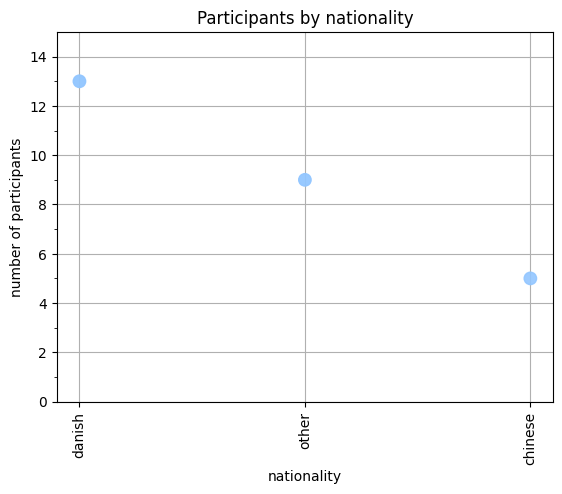

In [252]:
fig, ax=plt.subplots()

participants_df=my_df[["Name", "AgeGroup","Nationality", "Gender"]]
participants_df=participants_df.drop_duplicates()

nationality_counts=participants_df['Nationality'].value_counts()
ax.scatter(nationality_counts.index, nationality_counts.values, s=80, alpha=1-1/nationality_counts.values/2)

ax.set_yticks(np.arange(0,15,1), minor=True)
plt.setp(ax.get_xticklabels(), rotation=90)
ax.grid(True)
ax.set_axisbelow(True)
ax.set_ylim(0, 15)

ax.set_xlabel("nationality")
ax.set_ylabel("number of participants")
ax.set_title("Participants by nationality")

#fig.savefig("/content/drive/MyDrive/Plots/"+ax.get_title()+'.png', dpi=600, bbox_inches='tight')

# Statistical tests after changes

## ANOVA

## n-way ANOVA

### n-way ANOVA for pleasure

In [253]:
#statsmodel
my_model_fit=smf.ols(formula='pleasure ~ C(Gender)+C(AgeGroup)+C(Nationality)', data=my_df).fit()
print("\nANOVA table \nDependent variable: pleasure \nnull Hypothesis H0: data is similar (means are similar) \nIf p<0.05, reject H0 and accept H1: significant difference in data.\n")
anova_table=sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

anova_table


ANOVA table 
Dependent variable: pleasure 
null Hypothesis H0: data is similar (means are similar) 
If p<0.05, reject H0 and accept H1: significant difference in data.

                    sum_sq     df         F    PR(>F)
C(Gender)         1.642504    1.0  1.425957  0.233069
C(AgeGroup)       0.768003    2.0  0.333375  0.716682
C(Nationality)    2.111822    2.0  0.916700  0.400598
Residual        506.818608  440.0       NaN       NaN


,sum_sq,df,F,PR(>F)
C(Gender),1.642504,1.0,1.425957,0.233069
C(AgeGroup),0.768003,2.0,0.333375,0.716682
C(Nationality),2.111822,2.0,0.916700,0.400598
Residual,506.818608,440.0,NaN,NaN


### n-way ANOVA for arousal

In [254]:
#statsmodel
my_model_fit=smf.ols(formula='arousal ~ C(Gender)+C(AgeGroup)+C(Nationality)', data=my_df).fit()
print("\nANOVA table \nDependent variable: arousal \nnull Hypothesis H0: data is similar (means are similar) \nIf p<0.05, reject H0 and accept H1: significant difference in data.\n")
anova_table=sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

anova_table


ANOVA table 
Dependent variable: arousal 
null Hypothesis H0: data is similar (means are similar) 
If p<0.05, reject H0 and accept H1: significant difference in data.

                    sum_sq     df         F    PR(>F)
C(Gender)         3.673102    1.0  2.971697  0.085435
C(AgeGroup)       3.549463    2.0  1.435833  0.239030
C(Nationality)    9.226421    2.0  3.732284  0.024699
Residual        543.852603  440.0       NaN       NaN


,sum_sq,df,F,PR(>F)
C(Gender),3.673102,1.0,2.971697,0.085435
C(AgeGroup),3.549463,2.0,1.435833,0.239030
C(Nationality),9.226421,2.0,3.732284,0.024699
Residual,543.852603,440.0,NaN,NaN


### n-way ANOVA for dominance

In [255]:
#statsmodel
my_model_fit=smf.ols(formula='dominance ~ C(Gender)+C(AgeGroup)+C(Nationality)', data=my_df).fit()
print("\nANOVA table \nDependent variable: dominance \nnull Hypothesis H0: data is similar (means are similar) \nIf p<0.05, reject H0 and accept H1: significant difference in data.\n")
anova_table=sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

anova_table


ANOVA table 
Dependent variable: dominance 
null Hypothesis H0: data is similar (means are similar) 
If p<0.05, reject H0 and accept H1: significant difference in data.

                    sum_sq     df          F    PR(>F)
C(Gender)        18.014452    1.0  16.318121  0.000063
C(AgeGroup)       2.332894    2.0   1.056609  0.348513
C(Nationality)   11.518420    2.0   5.216894  0.005765
Residual        485.739681  440.0        NaN       NaN


,sum_sq,df,F,PR(>F)
C(Gender),18.014452,1.0,16.318121,0.000063
C(AgeGroup),2.332894,2.0,1.056609,0.348513
C(Nationality),11.518420,2.0,5.216894,0.005765
Residual,485.739681,440.0,NaN,NaN


## chi-square test

### Nationality test

After grouping nationalities, test is good for chi-square test because the frequences of groups are not less than 5.

In [256]:
from scipy.stats import chi2_contingency

contingency_table=pd.crosstab(my_df['Nationality'],my_df['pleasure'])
contingency_table
chi_test=chi2_contingency(contingency_table)
print("Chi-square test for nationality and pleasure: \nH0: Variables do not have a significant relation (expected frequences) \nIf p<0.05, reject H0.\n")
print(chi_test)

Chi-square test for nationality and pleasure: 
H0: Variables do not have a significant relation (expected frequences) 
If p<0.05, reject H0.

Chi2ContingencyResult(statistic=5.921369529598618, pvalue=0.6560393838302523, dof=8, expected_freq=array([[ 3.23991031, 16.00896861, 21.53587444, 31.25560538, 12.95964126],
       [ 8.34753363, 41.24663677, 55.48654709, 80.52914798, 33.39013453],
       [ 5.41255605, 26.74439462, 35.97757848, 52.21524664, 21.65022422]]))


In [257]:
from scipy.stats import chi2_contingency

contingency_table=pd.crosstab(my_df['Nationality'],my_df['arousal'])
contingency_table
chi_test=chi2_contingency(contingency_table)
print("Chi-square test for nationality and pleasure: \nH0: Variables do not have a significant relation (expected frequences) \nIf p<0.05, reject H0.\n")
print(chi_test)

Chi-square test for nationality and pleasure: 
H0: Variables do not have a significant relation (expected frequences) 
If p<0.05, reject H0.

Chi2ContingencyResult(statistic=21.54536935628192, pvalue=0.005831480175126639, dof=8, expected_freq=array([[19.43946188, 24.58520179, 22.10762332, 16.39013453,  2.47757848],
       [50.08520179, 63.34304933, 56.95964126, 42.22869955,  6.38340807],
       [32.47533632, 41.07174888, 36.93273543, 27.38116592,  4.13901345]]))


In [258]:
from scipy.stats import chi2_contingency

contingency_table=pd.crosstab(my_df['Nationality'],my_df['dominance'])
contingency_table
chi_test=chi2_contingency(contingency_table)
print("Chi-square test for nationality and pleasure: \nH0: Variables do not have a significant relation (expected frequences) \nIf p<0.05, reject H0.\n")
print(chi_test)

Chi-square test for nationality and pleasure: 
H0: Variables do not have a significant relation (expected frequences) 
If p<0.05, reject H0.

Chi2ContingencyResult(statistic=25.75922643828306, pvalue=0.00115469344283778, dof=8, expected_freq=array([[ 5.52690583, 20.39237668, 28.96860987, 20.39237668,  9.71973094],
       [14.23991031, 52.54035874, 74.6367713 , 52.54035874, 25.0426009 ],
       [ 9.23318386, 34.06726457, 48.39461883, 34.06726457, 16.23766816]]))


## Boxplot means difference check

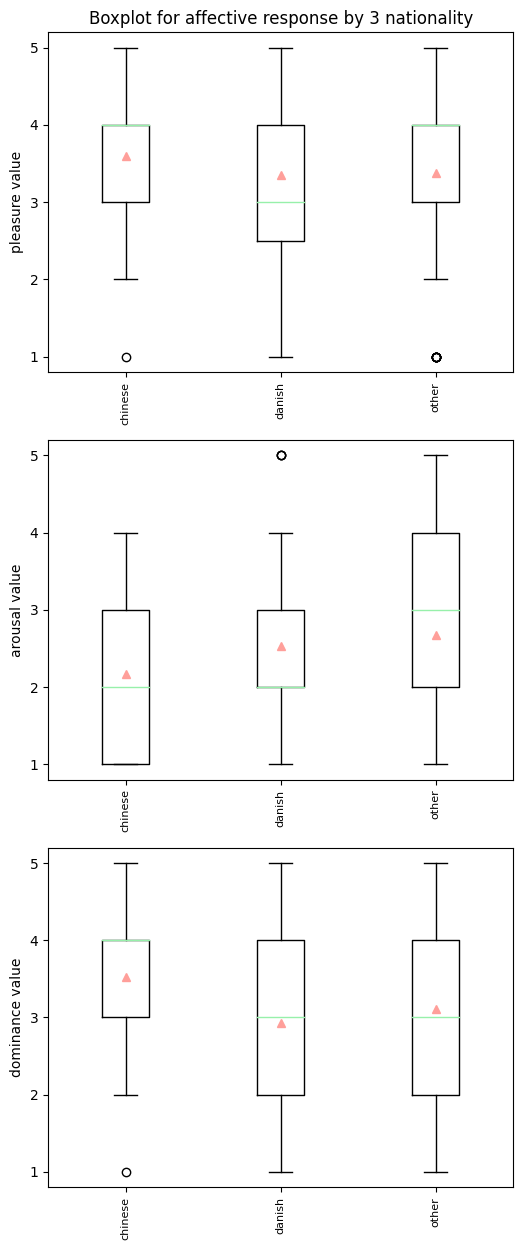

In [259]:
fig, ax=plt.subplots(3,1, figsize=(6,15))

grouped_df=my_df.groupby('Nationality')['pleasure']
boxplot=ax[0].boxplot(x=[group.values for name, group in grouped_df],
                   labels=grouped_df.groups.keys(), showmeans=True)
ex=plt.setp(ax[0].get_xticklabels(), rotation=90, fontsize=8 )
ax[0].set_ylabel("pleasure value")

grouped_df=my_df.groupby('Nationality')['arousal']
boxplot=ax[1].boxplot(x=[group.values for name, group in grouped_df],
                   labels=grouped_df.groups.keys(), showmeans=True)
ex=plt.setp(ax[1].get_xticklabels(), rotation=90, fontsize=8 )
ax[1].set_ylabel("arousal value")

grouped_df=my_df.groupby('Nationality')['dominance']
boxplot=ax[2].boxplot(x=[group.values for name, group in grouped_df],
                   labels=grouped_df.groups.keys(), showmeans=True)
ex=plt.setp(ax[2].get_xticklabels(), rotation=90, fontsize=8 )
ax[2].set_ylabel("dominance value")

ax[0].set_yticks(np.arange(1,6,1))
ax[1].set_yticks(np.arange(1,6,1))
ax[2].set_yticks(np.arange(1,6,1))

ax[0].set_title("Boxplot for affective response by 3 nationality")
fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_participants_and_affective_response/"+ax[0].get_title()+'.png', dpi=600, bbox_inches='tight')

## Post hod Tukey

In [260]:
import statsmodels.stats.multicomp as smm

one_tukey_smm = smm.pairwise_tukeyhsd(endog=my_df['arousal'],groups=my_df['Gender'],alpha=0.05)

print("Tukey test. H0: the means of the groups are equal")
print(one_tukey_smm)

Tukey test. H0: the means of the groups are equal
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2   -0.244 0.0235 -0.455 -0.033   True
--------------------------------------------------


In [261]:
import statsmodels.stats.multicomp as smm

one_tukey_smm = smm.pairwise_tukeyhsd(endog=my_df['pleasure'],groups=my_df['Nationality'],alpha=0.05)

print("Tukey test. H0: the means of the groups are equal")
print(one_tukey_smm)

Tukey test. H0: the means of the groups are equal
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
chinese danish  -0.2484 0.1668 -0.5708  0.074  False
chinese  other  -0.2197  0.295 -0.5657 0.1262  False
 danish  other   0.0287 0.9666 -0.2431 0.3005  False
----------------------------------------------------


In [262]:
import statsmodels.stats.multicomp as smm

one_tukey_smm = smm.pairwise_tukeyhsd(endog=my_df['arousal'],groups=my_df['Nationality'],alpha=0.05)

print("Tukey test. H0: the means of the groups are equal")
print(one_tukey_smm)

Tukey test. H0: the means of the groups are equal
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
chinese danish   0.3604 0.0317  0.0251 0.6957   True
chinese  other   0.5114 0.0026  0.1516 0.8711   True
 danish  other   0.1509 0.4211 -0.1317 0.4336  False
----------------------------------------------------


In [263]:
import statsmodels.stats.multicomp as smm

one_tukey_smm = smm.pairwise_tukeyhsd(endog=my_df['dominance'],groups=my_df['Nationality'],alpha=0.05)

print("Tukey test. H0: the means of the groups are equal")
print(one_tukey_smm)

Tukey test. H0: the means of the groups are equal
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
chinese danish  -0.6025    0.0 -0.9241 -0.2808   True
chinese  other  -0.4238 0.0113 -0.7689 -0.0786   True
 danish  other   0.1787 0.2689 -0.0925  0.4499  False
-----------------------------------------------------


# Dataset - new features

In [264]:
#my_df=raw_df
my_df["nrOfMinimalUnitsPerSpot"]=my_df.apply(lambda x:
                                            int(sum((math.sqrt(k*100*(x.spotRadius*k/x.nrCircles if (k==0 or k==x.nrCircles) else x.spotRadius*k/x.nrCircles*(1-0.4*k/(1+0.4*k))))+2)
                                            if k==x.nrCircles else (1 if k==0 else (math.sqrt(k*100*(x.spotRadius*k/x.nrCircles if (k==0 or k==x.nrCircles) else x.spotRadius*k/x.nrCircles*(1-0.4*k/(1+0.4*k))))+2+k))
                                                for k in range(0,x.nrCircles+1) ) ), axis=1)
my_df["opaqueAresOfSpot"]=my_df.apply(lambda x: x.nrOfMinimalUnitsPerSpot*3.14*0.026**2, axis=1)
my_df["areaOpaque"]=my_df.apply(lambda x: x.noOfSpots*x.opaqueAresOfSpot, axis=1)
my_df["covarageAreaOfSpot"]=my_df.apply(lambda x: 3.14*x.spotRadius**2, axis=1)
my_df["areaFacadeTotal"]=3.5*6
my_df["facadeDiagonal"]=math.sqrt(3.5**2+6**2)
my_df["procentageOpaqueOfFacade"]=my_df.apply(lambda x: round(x.areaOpaque/x.areaFacadeTotal,4), axis=1)
my_df["compactnessOfElement"]=my_df.apply(lambda x: round(x.opaqueAresOfSpot/x.covarageAreaOfSpot,4), axis=1)
my_df["boundingRadiusOfElementProc"]=my_df.apply(lambda x: round(x.spotRadius/x.facadeDiagonal,4), axis=1)
my_df["realSpeed"]=my_df.apply(lambda x: round(x.speed*34.67,2), axis=1)
my_df["maxNrOfElements"]=my_df.apply(lambda x: int(x.areaFacadeTotal/x.covarageAreaOfSpot if x.spotsPosition==0 else x.areaFacadeTotal/x.covarageAreaOfSpot/3), axis=1)
my_df["emptyNumberOfElements"]=my_df.apply(lambda x: x.maxNrOfElements-x.noOfSpots, axis=1)
my_df["filledProportionOnFacade"]=my_df.apply(lambda x: round(x.emptyNumberOfElements/x.noOfSpots,2), axis=1)
my_df["maxiumDistanceBetweenElements"]=my_df.apply(lambda x: (0 if x.emptyNumberOfElements<=2 else x.filledProportionOnFacade*2*x.spotRadius) if x.emptyNumberOfElements<x.maxNrOfElements*0.75 else 3, axis=1)
my_df["compactnessOfFacade"]=my_df.apply(lambda x: round(x.maxiumDistanceBetweenElements/x.facadeDiagonal,4), axis=1)
#my_df["accelerationOfChangingElementSize"]=my_df.apply(lambda x: 2*3.14*0.05**2 if ("explosion" in x.nameOfCurrentSequence and "big" in x.nameOfCurrentSequence) else (2*3.14*0.005**2 if ("explosion" in x.nameOfCurrentSequence and "small" in x.nameOfCurrentSequence) else 0), axis=1)
my_df["accelerationOfChangingElementSize"]=my_df.apply(lambda x: 2 if ("explosion" in x.nameOfCurrentSequence and "big" in x.nameOfCurrentSequence) else (1 if ("explosion" in x.nameOfCurrentSequence and "small" in x.nameOfCurrentSequence) else 0), axis=1)


pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)
my_df.head(50)
my_df.describe()

#save to csv
my_df.to_csv("/content/drive/MyDrive/Plots/Tables/"+"my_df"+".csv")


# Selected dataset

In [265]:
mySelected_secquences=my_df[~my_df['nameOfCurrentSequence'].isin(['initial mood', 'final mood', 'random 2', 'high speed few spots'])]
mySelected_df=mySelected_secquences[["pleasure", "arousal", "dominance", "spotsPosition", "allocatedTimeForRating", "procentageOpaqueOfFacade", "compactnessOfElement", "compactnessOfFacade", "boundingRadiusOfElementProc", "realSpeed", "accelerationOfChangingElementSize" ]]
mySelected_df.head(mySelected_df.shape[0])
print(my_df.shape)
print(mySelected_secquences.shape)
print(mySelected_df.shape)
mySelected_df.describe()

(446, 35)
(342, 35)
(342, 11)


,pleasure,arousal,dominance,spotsPosition,allocatedTimeForRating,procentageOpaqueOfFacade,compactnessOfElement,compactnessOfFacade,boundingRadiusOfElementProc,realSpeed,accelerationOfChangingElementSize
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,3.508772,2.400585,3.172515,0.371345,48.911579,0.111049,0.160230,0.066318,0.111642,7.598655,0.236842
std,1.068715,1.091315,1.097614,0.869555,64.161502,0.091826,0.399063,0.121843,0.062240,4.911811,0.582783
min,1.000000,1.000000,1.000000,0.000000,2.460000,0.004900,0.004600,0.000000,0.008600,3.470000,0.000000
25%,3.000000,2.000000,2.000000,0.000000,18.800000,0.039400,0.052300,0.000000,0.086400,3.470000,0.000000
50%,4.000000,2.000000,3.000000,0.000000,32.160000,0.100100,0.062000,0.000000,0.086400,6.930000,0.000000
75%,4.000000,3.000000,4.000000,0.000000,46.995000,0.166800,0.084625,0.118150,0.144000,6.930000,0.000000
max,5.000000,5.000000,5.000000,3.000000,559.920000,1.005700,6.196700,0.431900,0.439100,27.380000,2.000000


In [266]:
corrMatrix=mySelected_df.corr()
corrMatrix

,pleasure,arousal,dominance,spotsPosition,allocatedTimeForRating,procentageOpaqueOfFacade,compactnessOfElement,compactnessOfFacade,boundingRadiusOfElementProc,realSpeed,accelerationOfChangingElementSize
pleasure,1.000000,-0.451842,0.659947,0.048552,0.308296,0.058939,0.009446,-0.133633,-0.258660,0.006829,-0.325874
arousal,-0.451842,1.000000,-0.447125,0.012750,-0.254764,-0.005872,0.016107,0.065118,0.198123,0.081813,0.348368
dominance,0.659947,-0.447125,1.000000,0.027931,0.340689,-0.055595,0.032447,-0.026479,-0.188733,-0.007202,-0.238272
spotsPosition,0.048552,0.012750,0.027931,1.000000,0.237577,-0.079443,-0.109185,-0.196360,-0.161061,-0.024861,-0.174062
allocatedTimeForRating,0.308296,-0.254764,0.340689,0.237577,1.000000,-0.058898,-0.123897,-0.107078,-0.073337,0.031601,-0.239330
procentageOpaqueOfFacade,0.058939,-0.005872,-0.055595,-0.079443,-0.058898,1.000000,0.093562,-0.279058,-0.113448,-0.290013,-0.346076
compactnessOfElement,0.009446,0.016107,0.032447,-0.109185,-0.123897,0.093562,1.000000,0.419703,-0.293362,0.216734,0.107907
compactnessOfFacade,-0.133633,0.065118,-0.026479,-0.196360,-0.107078,-0.279058,0.419703,1.000000,-0.381339,0.258446,0.428586
boundingRadiusOfElementProc,-0.258660,0.198123,-0.188733,-0.161061,-0.073337,-0.113448,-0.293362,-0.381339,1.000000,-0.317188,0.318635
realSpeed,0.006829,0.081813,-0.007202,-0.024861,0.031601,-0.290013,0.216734,0.258446,-0.317188,1.000000,0.232460


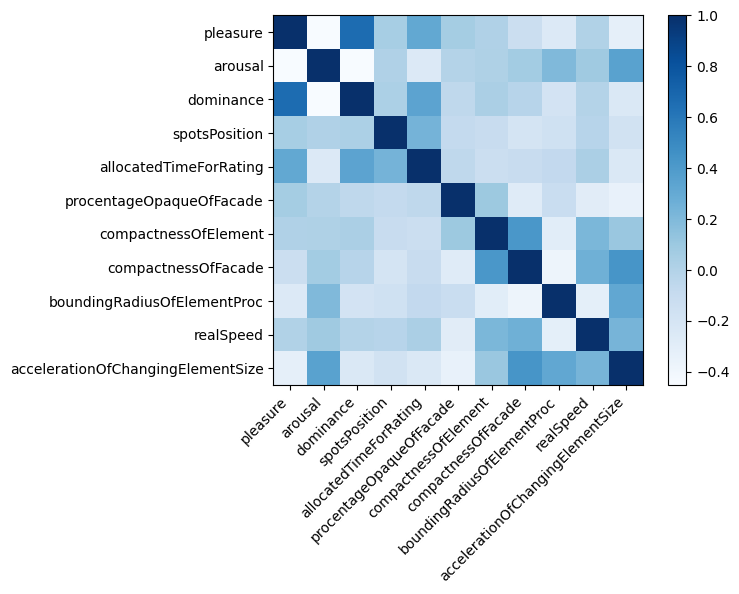

In [267]:
matrix = corrMatrix

#plotting correlation matrix
plt.imshow(matrix, cmap='Blues')

#adding colorbar
plt.colorbar()

#extracting variable names
variables = []
for i in matrix.columns:
  variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)

# Display the plot
plt.show()

# Features statistics

## realSpeed

Text(0.5, 1, 'Speed in cm per s')

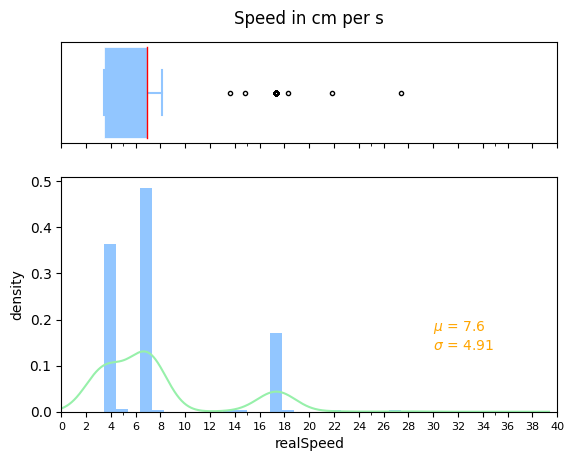

In [268]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)})
myFeature='realSpeed'

#box plot - the outliers are
VP = ax_box.boxplot(mySelected_df[myFeature], positions=[2], widths=1.5, patch_artist=True, vert=False,
                showmeans=False, showfliers=True,
                medianprops={"color": "red", "linewidth": 1},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5},
                flierprops={"markersize":3} )

ax_box.set_yticks(np.arange(0,0))
ax_box.set_xticks(np.arange(0,200,2))
ax_box.set_xlim(0,40)

#histogram plot
n, bins, patches=ax_hist.hist(mySelected_df[myFeature], bins='auto', density=True, cumulative=False)
#ax_hist.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())

myKde=(mySelected_df[myFeature]).plot.kde()


# add text box for the statistics
stats = (f"$\\mu$ = {(mySelected_df[myFeature]).mean().round(2)}\n"
         f"$\\sigma$ = {(mySelected_df[myFeature]).std().round(2)}\n"
         )
ax_hist.text(30,0.1,stats, color='orange')

ax_hist.set_xlabel(myFeature, fontsize=10)
ax_hist.set_ylabel("density", fontsize=10)
plt.setp(ax_hist.get_xticklabels(), fontsize=8)
ax_hist.set_title("Speed in cm per s", y=1, pad=110)

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_facade_features/"+ax_hist.get_title()+'.png', dpi=600, bbox_inches='tight')


(0.5, 5.5)

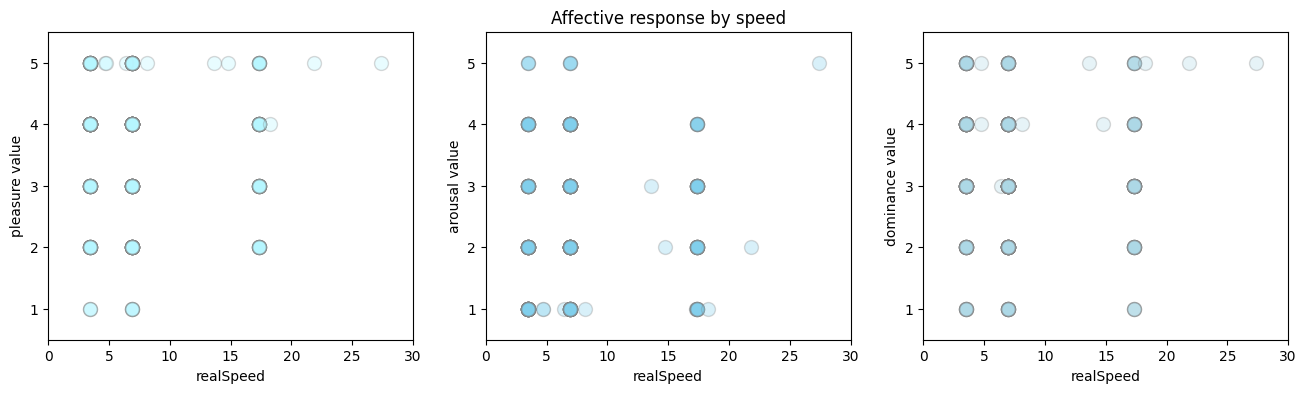

In [269]:
fig, ax=plt.subplots(1,3,figsize=(16,4))
myFeature='realSpeed'

ax[0].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['pleasure'],'o', color='#B6F6FF', markersize=10, label="pleasure", alpha=0.3, markeredgecolor='grey')
ax[1].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['arousal'],'o', color='#81CFEC', markersize=10, label="arousal", alpha=0.3, markeredgecolor='grey')
ax[2].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['dominance'],'o', color='lightblue', markersize=10, label="dominance", alpha=0.3, markeredgecolor='grey')


ax[0].set_xticks(np.arange(0,200,5), minor=False)
ax[0].set(xlabel=myFeature, ylabel="pleasure value")
ax[0].set_yticks(np.arange(1,6,1), minor=False)
ax[0].set_xlim(0,30)
ax[0].set_ylim(0.5,5.5)

ax[1].set_xticks(np.arange(0,200,5), minor=False)
ax[1].set(xlabel=myFeature, ylabel="arousal value")
ax[1].set_yticks(np.arange(1,6,1), minor=False)
ax[1].set_title("Affective response by speed")
ax[1].set_xlim(0,30)
ax[1].set_ylim(0.5,5.5)

ax[2].set_xticks(np.arange(0,200,5), minor=False)
ax[2].set(xlabel=myFeature, ylabel="dominance value")
ax[2].set_yticks(np.arange(1,6,1), minor=False)
ax[2].set_xlim(0,30)
ax[2].set_ylim(0.5,5.5)

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_facade_features/"+ax[1].get_title()+'.png', dpi=600, bbox_inches='tight')

## accelerationOfChangingElementSize

Text(0.5, 1.0, 'Acceleration of changing element size')

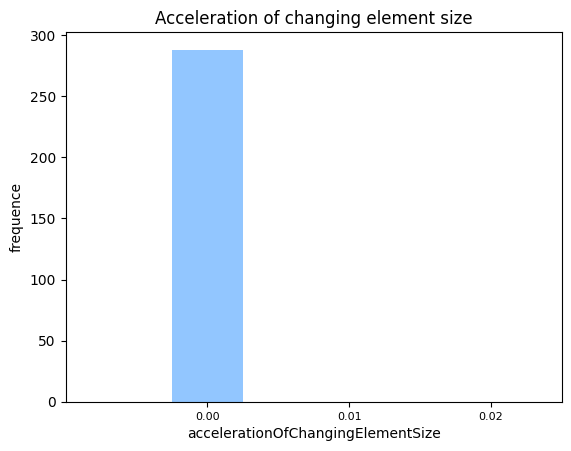

In [270]:
fig, ax_hist = plt.subplots()
myFeature='accelerationOfChangingElementSize'


#ax_hist.set_yticks(np.arange(0,0))
ax_hist.set_xticks(np.arange(0,0.1,0.01))
ax_hist.set_xlim(-0.01,0.025)



ax_hist.bar(mySelected_df[myFeature].value_counts().index, mySelected_df[myFeature].value_counts().values, width=0.005)


ax_hist.set_xlabel(myFeature, fontsize=10)
ax_hist.set_ylabel("frequence", fontsize=10)
plt.setp(ax_hist.get_xticklabels(), fontsize=8)
ax_hist.set_title("Acceleration of changing element size")

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_facade_features/"+ax_hist.get_title()+'.png', dpi=600, bbox_inches='tight')

(0.5, 5.5)

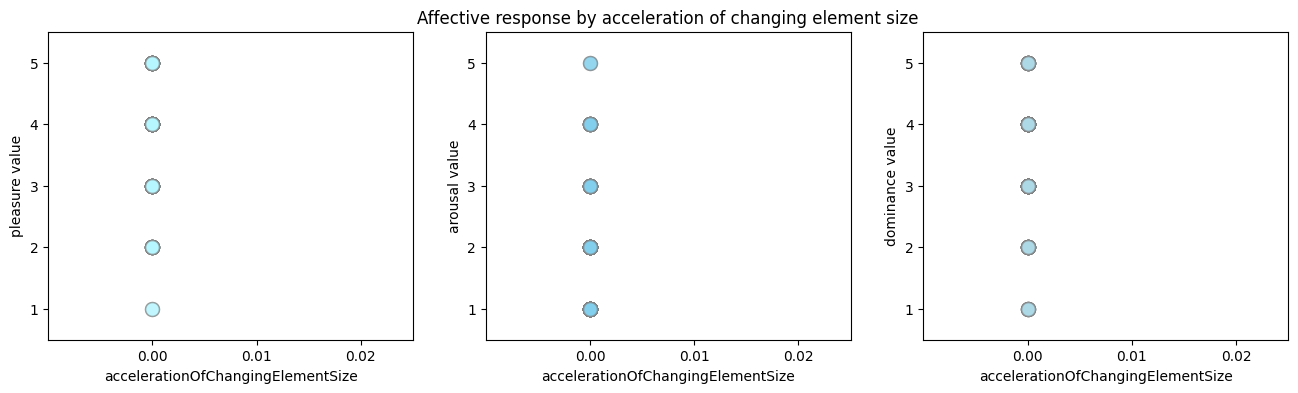

In [271]:
fig, ax=plt.subplots(1,3,figsize=(16,4))
myFeature='accelerationOfChangingElementSize'

ax[0].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['pleasure'],'o', color='#B6F6FF', markersize=10, label="pleasure", alpha=0.3, markeredgecolor='grey')
ax[1].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['arousal'],'o', color='#81CFEC', markersize=10, label="arousal", alpha=0.3, markeredgecolor='grey')
ax[2].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['dominance'],'o', color='lightblue', markersize=10, label="dominance", alpha=0.3, markeredgecolor='grey')


ax[0].set_xticks(np.arange(0,0.1,0.01))
ax[0].set(xlabel=myFeature, ylabel="pleasure value")
ax[0].set_yticks(np.arange(1,6,1), minor=False)
ax[0].set_xlim(-0.01,0.025)
ax[0].set_ylim(0.5,5.5)

ax[1].set_xticks(np.arange(0,0.1,0.01))
ax[1].set(xlabel=myFeature, ylabel="arousal value")
ax[1].set_yticks(np.arange(1,6,1), minor=False)
ax[1].set_title("Affective response by acceleration of changing element size")
ax[1].set_xlim(-0.01,0.025)
ax[1].set_ylim(0.5,5.5)

ax[2].set_xticks(np.arange(0,0.1,0.01))
ax[2].set(xlabel=myFeature, ylabel="dominance value")
ax[2].set_yticks(np.arange(1,6,1), minor=False)
ax[2].set_xlim(-0.01,0.025)
ax[2].set_ylim(0.5,5.5)

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_facade_features/"+ax[1].get_title()+'.png', dpi=600, bbox_inches='tight')

## procentageOpaqueOfFacade

(0.0, 1.2)

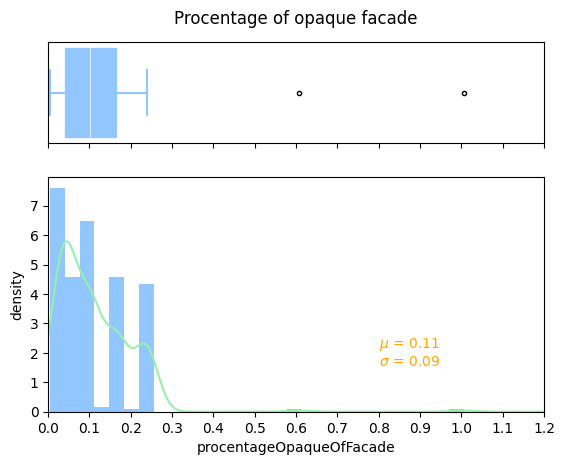

In [272]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)})
myFeature='procentageOpaqueOfFacade'

#box plot - the outliers are
VP = ax_box.boxplot(mySelected_df[myFeature], positions=[2], widths=1.5, patch_artist=True, vert=False,
                showmeans=False, showfliers=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5},
                flierprops={"markersize":3} )

ax_box.set_yticks(np.arange(0,0))
ax_box.set_xticks(np.arange(0,2,0.1))
ax_box.set_xlim(-0.2,1)

#histogram plot
n, bins, patches=ax_hist.hist(mySelected_df[myFeature], bins='auto', density=True, cumulative=False)
#ax_hist.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())

myKde=(mySelected_df[myFeature]).plot.kde()


# add text box for the statistics
stats = (f"$\\mu$ = {(mySelected_df[myFeature]).mean().round(2)}\n"
         f"$\\sigma$ = {(mySelected_df[myFeature]).std().round(2)}\n"
         )
ax_hist.text(0.8,1,stats, color='orange')

ax_hist.set(xlabel=myFeature, ylabel="density")
ax_hist.set_title("Procentage of opaque facade", y=1, pad=110)
ax_hist.set_xlim(0,1.2)

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_facade_features/"+ax_hist.get_title()+'.png', dpi=600, bbox_inches='tight')

(0.5, 5.5)

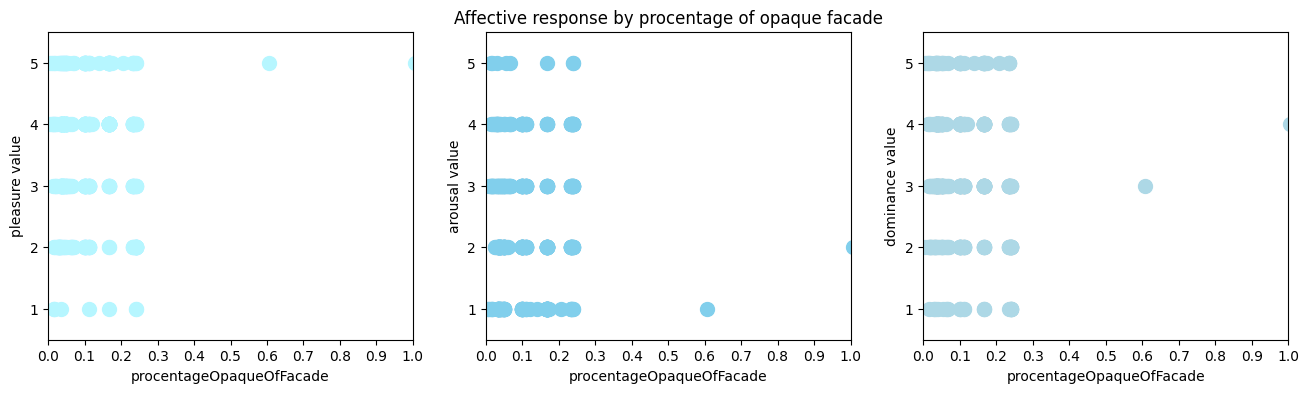

In [273]:
fig, ax=plt.subplots(1,3,figsize=(16,4))
myFeature='procentageOpaqueOfFacade'

ax[0].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['pleasure'],'o', color='#B6F6FF', markersize=10, label="pleasure")
ax[1].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['arousal'],'o', color='#81CFEC', markersize=10, label="arousal")
ax[2].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['dominance'],'o', color='lightblue', markersize=10, label="dominance")


ax[0].set_xticks(np.arange(0,1.1,0.1), minor=False)
ax[0].set(xlabel=myFeature, ylabel="pleasure value")
ax[0].set_yticks(np.arange(1,6,1), minor=False)
ax[0].set_xlim(0,1)
ax[0].set_ylim(0.5,5.5)

ax[1].set_xticks(np.arange(0,1.1,0.1), minor=False)
ax[1].set(xlabel=myFeature, ylabel="arousal value")
ax[1].set_yticks(np.arange(1,6,1), minor=False)
ax[1].set_title("Affective response by procentage of opaque facade")
ax[1].set_xlim(0,1)
ax[1].set_ylim(0.5,5.5)

ax[2].set_xticks(np.arange(0,1.1,0.1), minor=False)
ax[2].set(xlabel=myFeature, ylabel="dominance value")
ax[2].set_yticks(np.arange(1,6,1), minor=False)
ax[2].set_xlim(0,1)
ax[2].set_ylim(0.5,5.5)

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_facade_features/"+ax[1].get_title()+'.png', dpi=600, bbox_inches='tight')

## compactnessOfElement

Text(0.5, 1, 'Compactness of element')

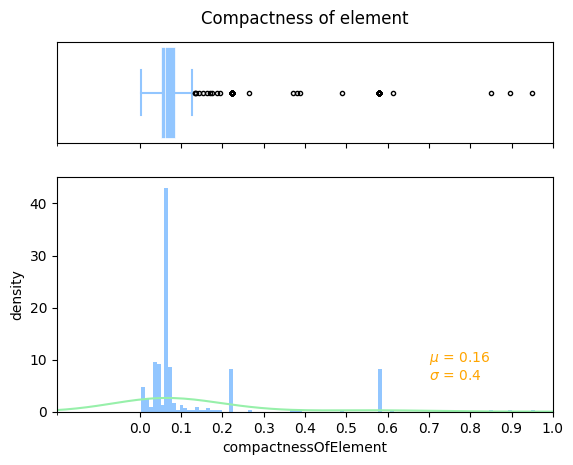

In [274]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)})
myFeature='compactnessOfElement'

#box plot - the outliers are
VP = ax_box.boxplot(mySelected_df[myFeature], positions=[2], widths=1.5, patch_artist=True, vert=False,
                showmeans=False, showfliers=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5},
                flierprops={"markersize":3} )

ax_box.set_yticks(np.arange(0,0))
ax_box.set_xticks(np.arange(0,2,0.1))
ax_box.set_xlim(-0.2,1)

#histogram plot
n, bins, patches=ax_hist.hist(mySelected_df[myFeature], bins='auto', density=True, cumulative=False)
#ax_hist.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())

myKde=(mySelected_df[myFeature]).plot.kde()


# add text box for the statistics
stats = (f"$\\mu$ = {(mySelected_df[myFeature]).mean().round(2)}\n"
         f"$\\sigma$ = {(mySelected_df[myFeature]).std().round(2)}\n"
         )
ax_hist.text(0.7,3,stats, color='orange')

ax_hist.set(xlabel=myFeature, ylabel="density")
ax_hist.set_title("Compactness of element", y=1, pad=110)

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_facade_features/"+ax_hist.get_title()+'.png', dpi=600, bbox_inches='tight')

(0.5, 5.5)

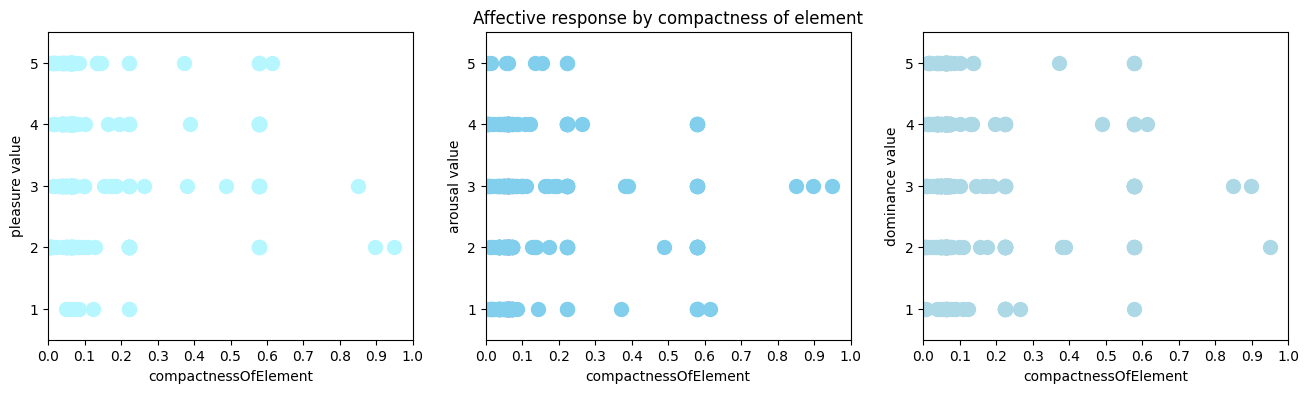

In [275]:
fig, ax=plt.subplots(1,3,figsize=(16,4))
myFeature='compactnessOfElement'

ax[0].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['pleasure'],'o', color='#B6F6FF', markersize=10, label="pleasure")
ax[1].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['arousal'],'o', color='#81CFEC', markersize=10, label="arousal")
ax[2].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['dominance'],'o', color='lightblue', markersize=10, label="dominance")


ax[0].set_xticks(np.arange(0,1.1,0.1), minor=False)
ax[0].set(xlabel=myFeature, ylabel="pleasure value")
ax[0].set_yticks(np.arange(1,6,1), minor=False)
ax[0].set_xlim(0,1)
ax[0].set_ylim(0.5,5.5)

ax[1].set_xticks(np.arange(0,1.1,0.1), minor=False)
ax[1].set(xlabel=myFeature, ylabel="arousal value")
ax[1].set_yticks(np.arange(1,6,1), minor=False)
ax[1].set_title("Affective response by compactness of element")
ax[1].set_xlim(0,1)
ax[1].set_ylim(0.5,5.5)

ax[2].set_xticks(np.arange(0,1.1,0.1), minor=False)
ax[2].set(xlabel=myFeature, ylabel="dominance value")
ax[2].set_yticks(np.arange(1,6,1), minor=False)
ax[2].set_xlim(0,1)
ax[2].set_ylim(0.5,5.5)

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_facade_features/"+ax[1].get_title()+'.png', dpi=600, bbox_inches='tight')

## compactnessOfFacade

Text(0.5, 1, 'Compactness of facade')

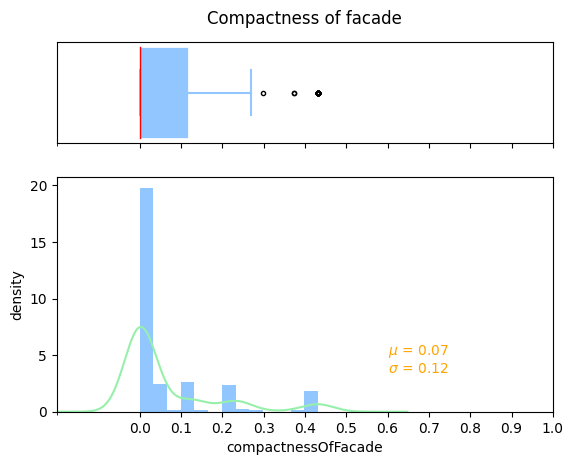

In [276]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)})
myFeature='compactnessOfFacade'

#box plot - the outliers are
VP = ax_box.boxplot(mySelected_df[myFeature], positions=[2], widths=1.5, patch_artist=True, vert=False,
                showmeans=False, showfliers=True,
                medianprops={"color": "red", "linewidth": 1},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5},
                flierprops={"markersize":3} )

ax_box.set_yticks(np.arange(0,0))
ax_box.set_xticks(np.arange(0,2,0.1))
ax_box.set_xlim(-0.2,1)

#histogram plot
n, bins, patches=ax_hist.hist(mySelected_df[myFeature], bins='auto', density=True, cumulative=False)
#ax_hist.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())

myKde=(mySelected_df[myFeature]).plot.kde()


# add text box for the statistics
stats = (f"$\\mu$ = {(mySelected_df[myFeature]).mean().round(2)}\n"
         f"$\\sigma$ = {(mySelected_df[myFeature]).std().round(2)}\n"
         )
ax_hist.text(0.6,2,stats, color='orange')

ax_hist.set(xlabel=myFeature, ylabel="density")
ax_hist.set_title('Compactness of facade', y=1, pad=110)

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_facade_features/"+ax_hist.get_title()+'.png', dpi=600, bbox_inches='tight')

(0.5, 5.5)

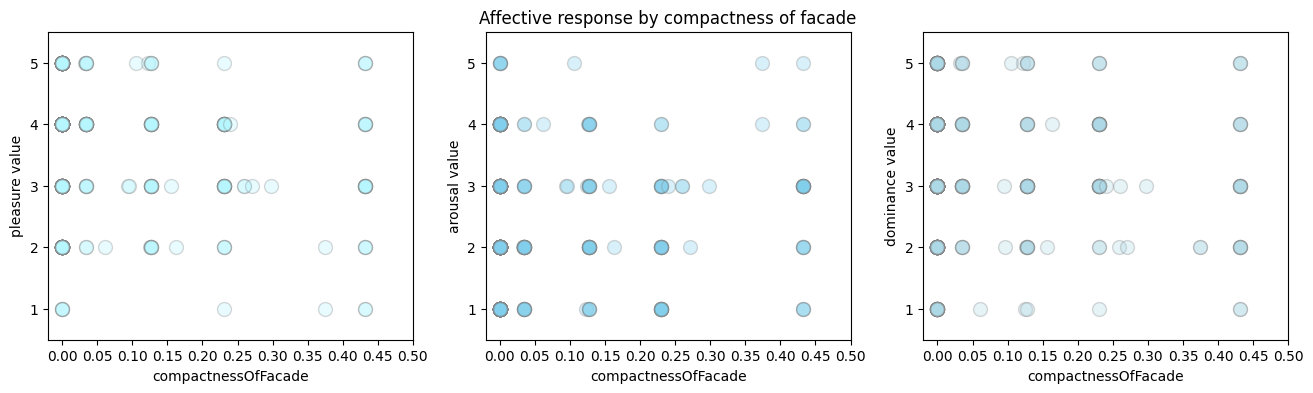

In [277]:
fig, ax=plt.subplots(1,3,figsize=(16,4))
myFeature='compactnessOfFacade'

ax[0].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['pleasure'],'o', color='#B6F6FF', markersize=10, label="pleasure", alpha=0.3, markeredgecolor='grey')
ax[1].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['arousal'],'o', color='#81CFEC', markersize=10, label="arousal", alpha=0.3, markeredgecolor='grey')
ax[2].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['dominance'],'o', color='lightblue', markersize=10, label="dominance", alpha=0.3, markeredgecolor='grey')


ax[0].set_xticks(np.arange(0,1.1,0.05), minor=False)
ax[0].set(xlabel=myFeature, ylabel="pleasure value")
ax[0].set_yticks(np.arange(1,6,1), minor=False)
ax[0].set_xlim(-0.02,0.5)
ax[0].set_ylim(0.5,5.5)

ax[1].set_xticks(np.arange(0,1.1,0.05), minor=False)
ax[1].set(xlabel=myFeature, ylabel="arousal value")
ax[1].set_yticks(np.arange(1,6,1), minor=False)
ax[1].set_title("Affective response by compactness of facade")
ax[1].set_xlim(-0.02,0.5)
ax[1].set_ylim(0.5,5.5)

ax[2].set_xticks(np.arange(0,1.1,0.05), minor=False)
ax[2].set(xlabel=myFeature, ylabel="dominance value")
ax[2].set_yticks(np.arange(1,6,1), minor=False)
ax[2].set_xlim(-0.02,0.5)
ax[2].set_ylim(0.5,5.5)

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_facade_features/"+ax[1].get_title()+'.png', dpi=600, bbox_inches='tight')

## boundingRadiusOfElementProc

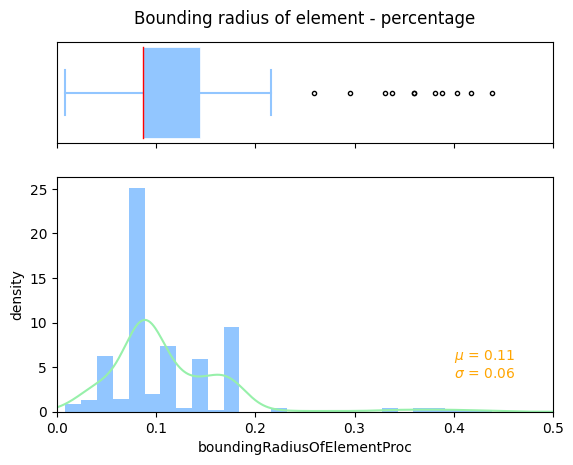

In [283]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)})
myFeature='boundingRadiusOfElementProc'

#box plot - the outliers are
VP = ax_box.boxplot(mySelected_df[myFeature], positions=[2], widths=1.5, patch_artist=True, vert=False,
                showmeans=False, showfliers=True,
                medianprops={"color": "red", "linewidth": 1},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5},
                flierprops={"markersize":3} )

ax_box.set_yticks(np.arange(0,0))
ax_box.set_xticks(np.arange(0,2,0.1))
ax_box.set_xlim(0,0.5)

#histogram plot
n, bins, patches=ax_hist.hist(mySelected_df[myFeature], bins='auto', density=True, cumulative=False)
#ax_hist.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())

myKde=(mySelected_df[myFeature]).plot.kde()


# add text box for the statistics
stats = (f"$\\mu$ = {(mySelected_df[myFeature]).mean().round(2)}\n"
         f"$\\sigma$ = {(mySelected_df[myFeature]).std().round(2)}\n"
         )
ax_hist.text(0.4,2,stats, color='orange')

ax_hist.set(xlabel=myFeature, ylabel="density")
ax_hist.set_title('Bounding radius of element - percentage', y=1, pad=110)

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_facade_features/"+ax_hist.get_title()+'.png', dpi=600, bbox_inches='tight')

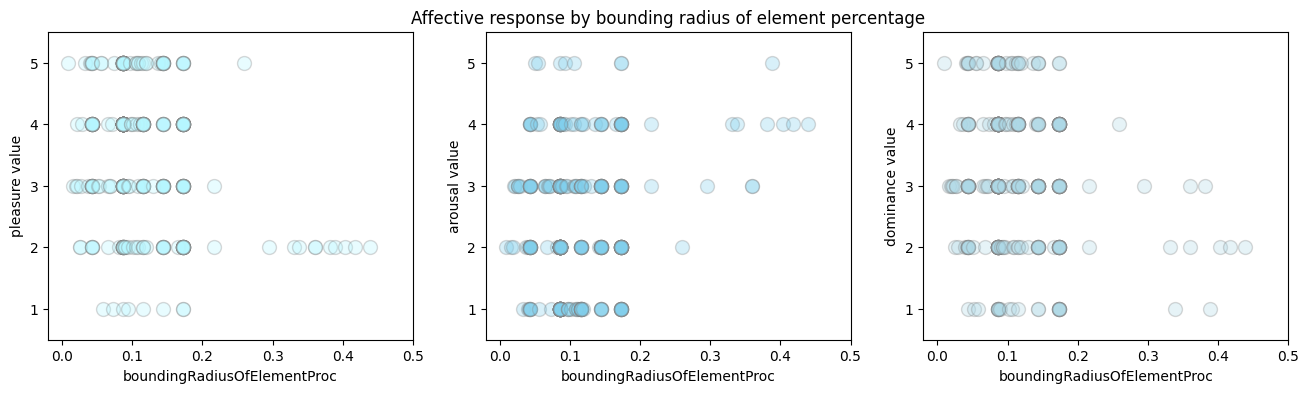

In [287]:
fig, ax=plt.subplots(1,3,figsize=(16,4))
myFeature='boundingRadiusOfElementProc'

ax[0].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['pleasure'],'o', color='#B6F6FF', markersize=10, label="pleasure", alpha=0.3, markeredgecolor='grey')
ax[1].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['arousal'],'o', color='#81CFEC', markersize=10, label="arousal", alpha=0.3, markeredgecolor='grey')
ax[2].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['dominance'],'o', color='lightblue', markersize=10, label="dominance", alpha=0.3, markeredgecolor='grey')


ax[0].set_xticks(np.arange(0,1.7,0.1), minor=False)
ax[0].set(xlabel=myFeature, ylabel="pleasure value")
ax[0].set_yticks(np.arange(1,6,1), minor=False)
ax[0].set_xlim(-0.02,0.5)
ax[0].set_ylim(0.5,5.5)

ax[1].set_xticks(np.arange(0,1.7,0.1), minor=False)
ax[1].set(xlabel=myFeature, ylabel="arousal value")
ax[1].set_yticks(np.arange(1,6,1), minor=False)
ax[1].set_title("Affective response by bounding radius of element percentage")
ax[1].set_xlim(-0.02,0.5)
ax[1].set_ylim(0.5,5.5)

ax[2].set_xticks(np.arange(0,1.7,0.1), minor=False)
ax[2].set(xlabel=myFeature, ylabel="dominance value")
ax[2].set_yticks(np.arange(1,6,1), minor=False)
ax[2].set_xlim(-0.02,0.5)
ax[2].set_ylim(0.5,5.5)

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_facade_features/"+ax[1].get_title()+'.png', dpi=600, bbox_inches='tight')

## spotsPosition

Text(0.5, 1.0, "Elements' position range over the facade")

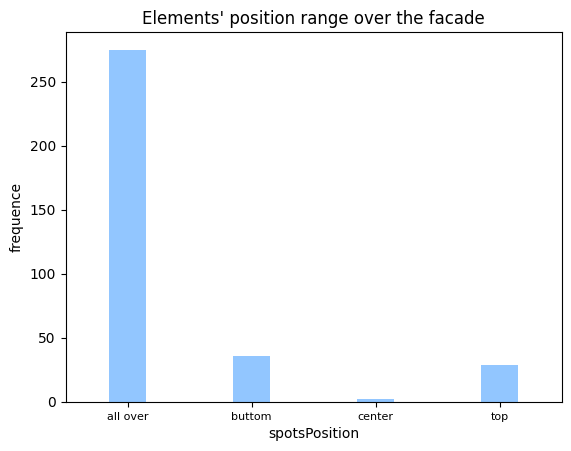

In [288]:
fig, ax_hist = plt.subplots()
myFeature='spotsPosition'


#ax_hist.set_yticks(np.arange(0,0))
ax_hist.set_xticks([0,1,2,3], labels=['all over', 'buttom', 'center', 'top'])
ax_hist.set_xlim(-0.5,3.5)



ax_hist.bar(mySelected_df[myFeature].value_counts().index, mySelected_df[myFeature].value_counts().values, width=0.3)


ax_hist.set_xlabel(myFeature, fontsize=10)
ax_hist.set_ylabel("frequence", fontsize=10)
plt.setp(ax_hist.get_xticklabels(), fontsize=8)
ax_hist.set_title("Elements' position range over the facade")

#fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_facade_features/"+ax_hist.get_title()+'.png', dpi=600, bbox_inches='tight')

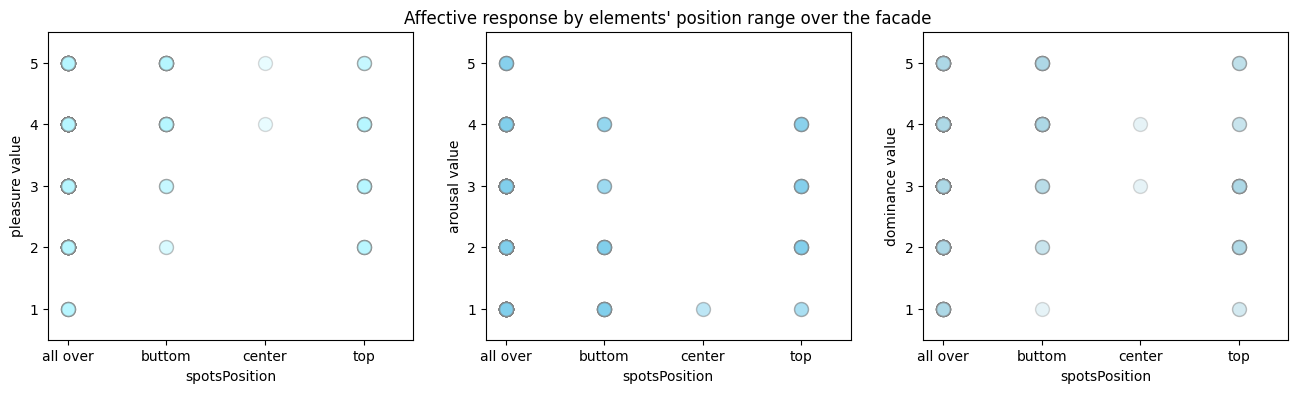

In [289]:
fig, ax=plt.subplots(1,3,figsize=(16,4))
myFeature='spotsPosition'

ax[0].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['pleasure'],'o', color='#B6F6FF', markersize=10, label="pleasure", alpha=0.3, markeredgecolor='grey')
ax[1].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['arousal'],'o', color='#81CFEC', markersize=10, label="arousal", alpha=0.3, markeredgecolor='grey')
ax[2].plot((mySelected_df.sort_values(by=[myFeature]))[myFeature], (mySelected_df.sort_values(by=[myFeature]))['dominance'],'o', color='lightblue', markersize=10, label="dominance", alpha=0.3, markeredgecolor='grey')


ax[0].set_xticks([0,1,2,3], labels=['all over', 'buttom', 'center', 'top'])
ax[0].set(xlabel=myFeature, ylabel="pleasure value")
ax[0].set_yticks(np.arange(1,6,1), minor=False)
ax[0].set_xlim(-0.2,3.5)
ax[0].set_ylim(0.5,5.5)

ax[1].set_xticks([0,1,2,3], labels=['all over', 'buttom', 'center', 'top'])
ax[1].set(xlabel=myFeature, ylabel="arousal value")
ax[1].set_yticks(np.arange(1,6,1), minor=False)
ax[1].set_title("Affective response by elements' position range over the facade")
ax[1].set_xlim(-0.2,3.5)
ax[1].set_ylim(0.5,5.5)

ax[2].set_xticks([0,1,2,3], labels=['all over', 'buttom', 'center', 'top'])
ax[2].set(xlabel=myFeature, ylabel="dominance value")
ax[2].set_yticks(np.arange(1,6,1), minor=False)
ax[2].set_xlim(-0.2,3.5)
ax[2].set_ylim(0.5,5.5)

fig.savefig("/content/drive/MyDrive/Plots/Plots_describing_facade_features/"+ax[1].get_title()+'.png', dpi=600, bbox_inches='tight')